# IS 670 Assignment 3
---

##Introduction

In this assignment, our goal is to find out how well we can predict the quality of wine based on its chemical makeup. We're going to use a dataset called "Wine Quality" that has information on various types of wine and how good they are, according to expert ratings. This data includes things like the alcohol content, acidity, sugar level, and other chemical properties that can influence a wine's taste and quality.

###Objective
We aim to compare different ways of predicting wine quality using this dataset. We'll try simple methods that look at one chemical property at a time, and more complex ones that consider many properties together or even use algorithms that can learn patterns from the data. By trying out these different methods, we hope to find out which one is best at predicting wine quality. This means we're looking for the method that makes predictions that are closest to the actual quality ratings given by experts.

###Definitions
Descriptive Analytics: The process of using statistical techniques to describe or summarize a set of data.<br>

Simple Linear Regression (OLS): A method for predicting a quantitative response using a single predictor variable. It assumes a linear relationship between the predictor (X) and the response (Y).<br>

Multiple Linear Regression: An extension of simple linear regression that uses multiple predictor variables to forecast the response variable.<br>

Regression Trees: A type of decision tree designed for continuous response variables. It splits the data into branches to form a tree structure, with each terminal node (leaf) representing a prediction for the response variable.<br>

Support Vector Regression (SVR): A type of Support Vector Machine (SVM) used for regression problems. It fits the error within a certain threshold and can handle both linear and non-linear data.<br>

Multi-layer Perceptron (MLP): A class of feedforward artificial neural network (ANN) that consists of at least three layers of nodes: an input layer, a hidden layer, and an output layer. MLP utilizes a backpropagation technique for training.<br>

Mean Absolute Error (MAE): A measure of errors between paired observations expressing the same phenomenon. It's the average of the absolute errors between the predicted values and actual values.<br>

Root Mean Squared Error (RMSE): A quadratic scoring rule that measures the average magnitude of the error. It's the square root of the average of squared differences between prediction and actual observation.

R-squared:
This is a statistical measure of how close the data is to the fitted regression line. It is also known as the coefficient of determination, or the proportion of variance in the dependent variable that can be explained by the independent variable(s).

Adjusted R-squared:
This statistic modifies the R-squared value to account for the number of predictors in a model relative to the number of data points. Unlike R-squared, it does not automatically increase when adding more predictors.

Outliers:
These are data points that diverge in a significant manner from the overall pattern of data in a dataset. Outliers can arise from errors in data entry or collection, or they can represent a true deviation in the measurement. They can have a substantial impact on statistical analyses and may require special treatment.

Null Values:
These represent instances where data is missing or unrecorded in a dataset. Null values can occur for various reasons, from errors in data transmission to omitted measurements. Dealing with these gaps in data is a critical step in preparing your dataset for analysis.

Bias:
This is the systemic deviation from the truth in data collection, analysis, interpretation, and publication. In statistical modeling, bias can lead to underfitting, where a model fails to capture important trends in the data.

Variance:
This term captures the extent to which model predictions would alter if trained on a different subset of the dataset. A model with high variance pays too much attention to the training data, leading to overfitting, where the model performs well on its training data but poorly on unseen data.

## Data Preparation

• Load the Wine Quality dataset into Google Colab.<br>
• Perform descriptive analytics (i.e., statistics, visualizations) to understand the dataset, the
variables and the relationships among them.<br>
• Handle missing values, highly correlated predictors (at 90%+ level), outliers, and encode
categorical variables, if necessary.<br>
• Split the dataset into training and testing sets.

In [335]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [336]:
# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score, recall_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

In [337]:
# Read data
wine = pd.read_csv("/content/drive/MyDrive/IS670_data/winequality-red.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [338]:
wine.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [339]:
print(wine.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [340]:
# exploring relationships among all numeric variables: correlation matrix
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [341]:
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1
filtered = wine[~((wine < (Q1 - 1.5 * IQR)) |(wine > (Q3 + 1.5 * IQR))).any(axis=1)]

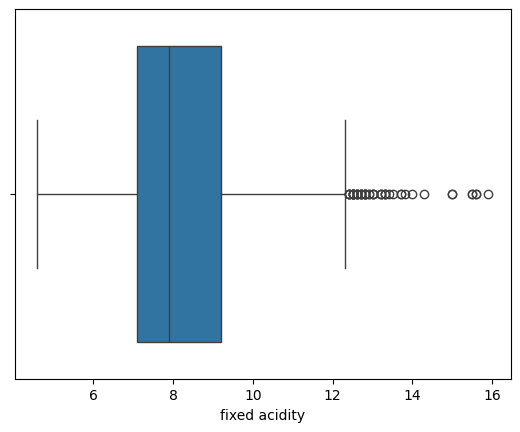

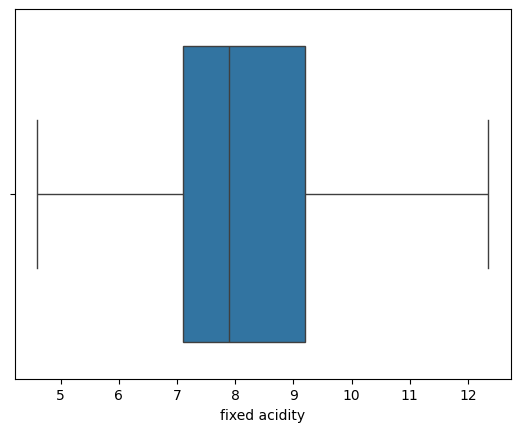

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.290901          0.526429     0.270922        2.322358   
std         1.655860          0.174045     0.194614        0.609493   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        12.350000          1.015000     0.915000        3.650000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.081194            15.689181             45.714822     0.996742   
std       0.017822             9.837494             30.374029     0.001806   
min       0.040000             1.000000         

In [342]:
# Outliers
# 1. Visual inspection using Boxplot
sns.boxplot(x=wine['fixed acidity'])
plt.show()

# 2. Detecting outliers using the IQR
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1

# 3. Capping outliers using clip
for column in wine.select_dtypes(include=[np.number]).columns:  # Select only numeric columns
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    wine[column] = wine[column].clip(lower=lower_bound, upper=upper_bound)

# After capping, you can recheck with boxplot to see changes
sns.boxplot(x=wine['fixed acidity'])
plt.show()

# Optionally, checking the DataFrame for changes
print(wine.describe())


In [343]:
# Calculate the correlation matrix
corr_matrix = wine.corr()

# Find pairs of highly correlated features
high_corr_vars = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:  # mentioned 90%+ level
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            high_corr_vars.add(colname_i)
            high_corr_vars.add(colname_j)

# Plot heatmap for highly correlated variables only if any
if high_corr_vars:
    plt.figure(figsize=(10, 10))
    sns.heatmap(wine[list(high_corr_vars)].corr(), annot=True, cmap="RdYlGn")
    plt.show()
else:
    print("No highly correlated variables found with threshold of 0.9")

No highly correlated variables found with threshold of 0.9


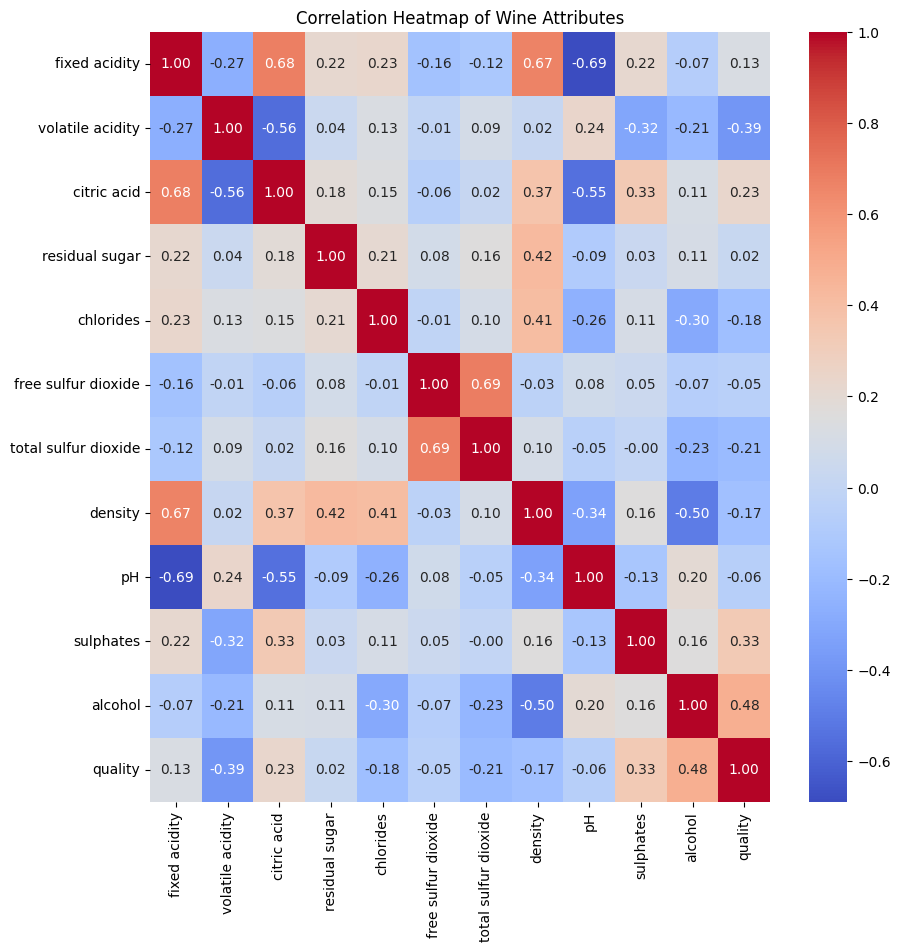

In [344]:
#Correlation Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(wine.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Wine Attributes')
plt.show()

In [345]:
# Select the desired columns only
desired_columns = desired_variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
Data_desired = wine [desired_columns]

In [346]:
for column in desired_columns:
    print(f"Descriptive statistics for {column}:")
    print(wine[column].describe(), "\n")

Descriptive statistics for fixed acidity:
count    1599.000000
mean        8.290901
std         1.655860
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        12.350000
Name: fixed acidity, dtype: float64 

Descriptive statistics for volatile acidity:
count    1599.000000
mean        0.526429
std         0.174045
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.015000
Name: volatile acidity, dtype: float64 

Descriptive statistics for citric acid:
count    1599.000000
mean        0.270922
std         0.194614
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         0.915000
Name: citric acid, dtype: float64 

Descriptive statistics for residual sugar:
count    1599.000000
mean        2.322358
std         0.609493
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max         3.650000
Name: residual sugar, dtype: float64 

Desc

In [347]:
# Show the head rows of a data frame
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [348]:
# Examine missing values again
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [349]:
# Set missing values as none
wine = wine.fillna('None')

In [350]:
# Examine missing values again
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [351]:
# Examine variable type
Data_desired.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [352]:
# Change categorical variables to "category"
# This step is not needed as the dtypes are already in desired formats

In [353]:
# Examine variable type
Data_desired.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [354]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.290901,0.526429,0.270922,2.322358,0.081194,15.689181,45.714822,0.996742,3.310353,0.649831,10.419627,5.633521
std,1.655860,0.174045,0.194614,0.609493,0.017822,9.837494,30.374029,0.001806,0.149851,0.137086,1.054808,0.783211
min,4.600000,0.120000,0.000000,0.900000,0.040000,1.000000,6.000000,0.992248,2.925000,0.330000,8.400000,3.500000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,12.350000,1.015000,0.915000,3.650000,0.120000,42.000000,122.000000,1.001187,3.685000,1.000000,13.500000,7.500000


##Visualizing the data
Use different types of graphs to get a visual idea of how the data is distributed over different things.

1. Histogram of Quality: This shows the distribution of the wine quality ratings in your dataset. It's crucial to understand the frequency of each quality score, as it helps in assessing the balance or imbalance within the dataset.

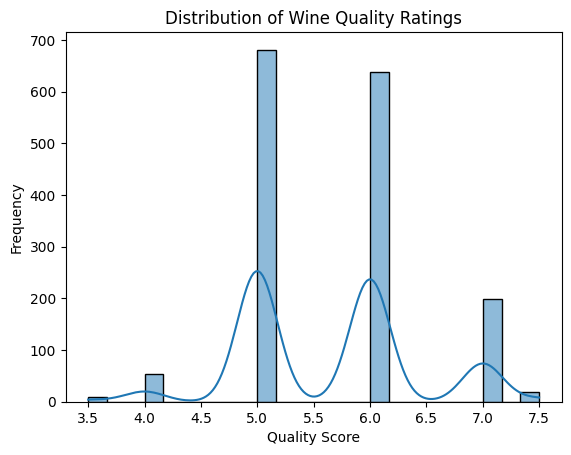

In [355]:
sns.histplot(data=wine, x='quality', kde=True)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.show()

2. Boxplot of Alcohol by Quality: This graph can help determine how alcohol content varies with different quality ratings. Alcohol content might influence the sensory attributes that affect quality scores.

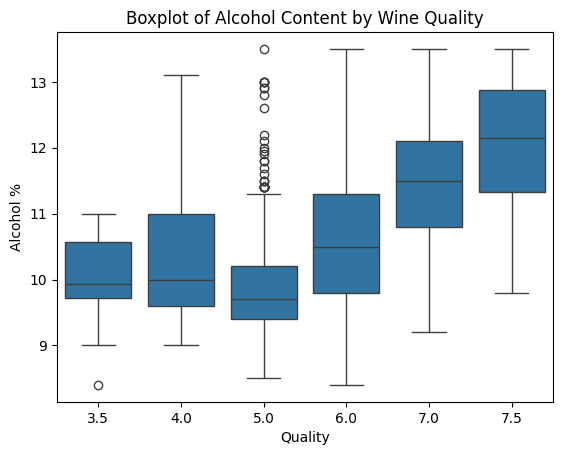

In [356]:
sns.boxplot(x='quality', y='alcohol', data=wine)
plt.title('Boxplot of Alcohol Content by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol %')
plt.show()

3. Scatter Plot of Volatile Acidity vs Quality: Given that acidity might influence wine's taste, a scatter plot can help visualize the relationship between volatile acidity and quality scores.

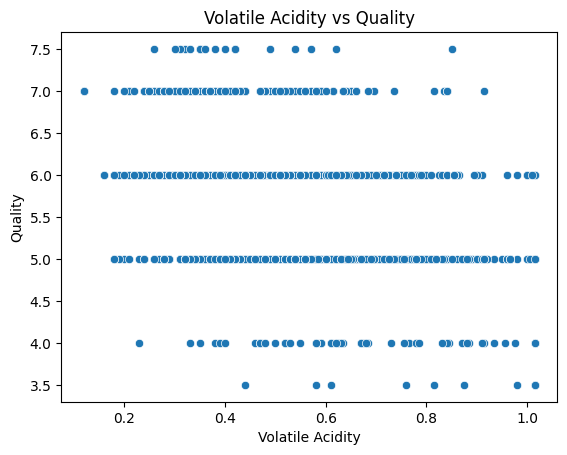

In [357]:
sns.scatterplot(x='volatile acidity', y='quality', data=wine)
plt.title('Volatile Acidity vs Quality')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.show()

4. Bar Plot of Average Sulphates by Quality: Understanding how sulphates (which can impact wine preservation and taste) relate to quality can reveal insights into their chemical contributions.

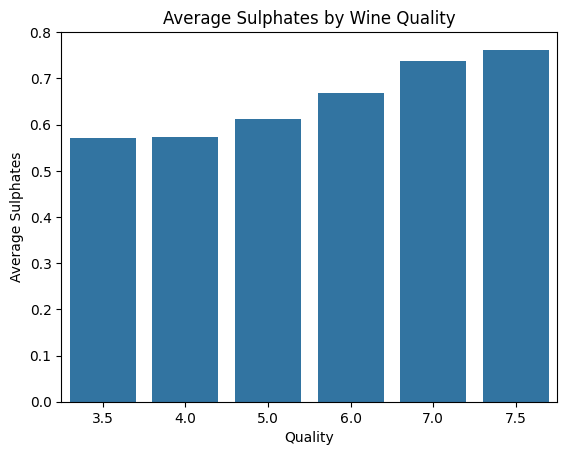

In [358]:
avg_sulphates = wine.groupby('quality')['sulphates'].mean().reset_index()
sns.barplot(x='quality', y='sulphates', data=avg_sulphates)
plt.title('Average Sulphates by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Average Sulphates')
plt.show()

5. Density Plot of pH Values: Since pH can influence taste and stability, a density plot allows for the visualization of pH distribution across the dataset, indicating commonality and extremes.

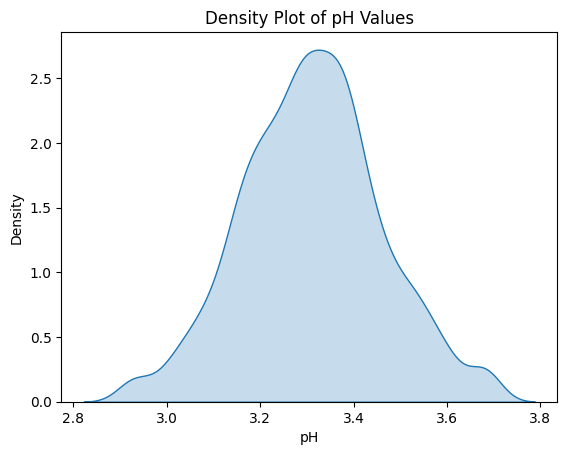

In [359]:
sns.kdeplot(data=wine, x='pH', fill=True)
plt.title('Density Plot of pH Values')
plt.xlabel('pH')
plt.show()

6. Jointplot of Residual Sugar and Alcohol: This plot can help explore the relationship between residual sugar and alcohol content, as both can affect the flavor profile of wine.

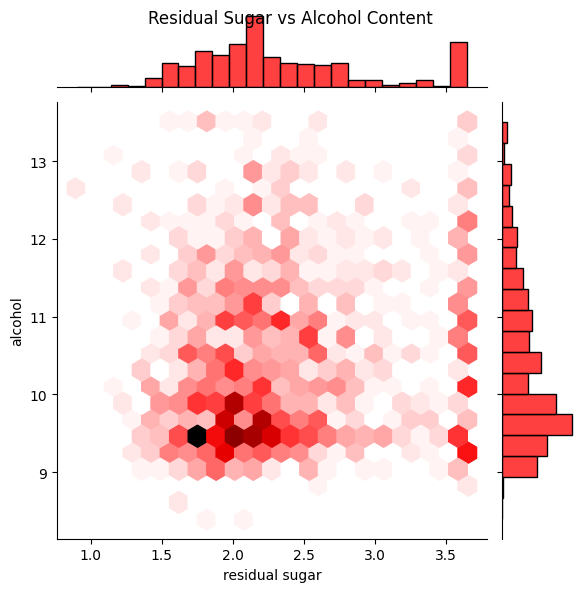

In [360]:
sns.jointplot(x='residual sugar', y='alcohol', data=wine, kind='hex', color='r')
plt.suptitle('Residual Sugar vs Alcohol Content', verticalalignment='top')
plt.show()

7. Violin Plot for Total Sulfur Dioxide by Quality: This can help visualize the distribution and probability density of total sulfur dioxide at different quality levels.

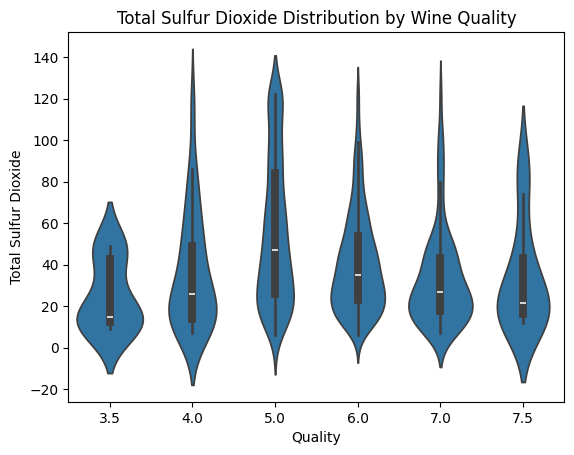

In [361]:
sns.violinplot(x='quality', y='total sulfur dioxide', data=wine)
plt.title('Total Sulfur Dioxide Distribution by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Total Sulfur Dioxide')
plt.show()

## Partitioning the data

In [362]:
# Create dummy variables
#wine = pd.get_dummies(wine, columns=['density','pH'], drop_first=True)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [363]:
# Examine the porportion of target variable for data set
target = Data_desired['quality']
print(target.value_counts(normalize=True))

quality
5.0    0.425891
6.0    0.398999
7.0    0.124453
4.0    0.033146
7.5    0.011257
3.5    0.006254
Name: proportion, dtype: float64


In [364]:
# Partition the data
target = wine['quality']
predictors = wine.drop(['quality'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(1119, 11) (480, 11) (1119,) (480,)


In [366]:
print(predictors_train.shape)
print(target_train.shape)
print(predictors_train.head())
print(target_train.head())

(1119, 11)
(1119,)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
92              8.6              0.49         0.29            2.00      0.110   
1017            8.0              0.18         0.37            0.90      0.049   
1447            6.8              0.67         0.00            1.90      0.080   
838            10.1              0.31         0.35            1.60      0.075   
40              7.3              0.45         0.36            3.65      0.074   

      free sulfur dioxide  total sulfur dioxide   density     pH  sulphates  \
92                   19.0                 122.0  0.997200  2.930       1.00   
1017                 36.0                 109.0  0.992248  2.925       0.44   
1447                 22.0                  39.0  0.997010  3.400       0.74   
838                   9.0                  28.0  0.996720  3.240       0.83   
40                   12.0                  87.0  0.997800  3.330       0.83   

      alcohol  
92 

In [367]:
# Examine the porportion of target variable for train set
print(target_train.value_counts(normalize=True), target_train.shape)

quality
5.0    0.422699
6.0    0.387846
7.0    0.137623
4.0    0.033959
7.5    0.011618
3.5    0.006256
Name: proportion, dtype: float64 (1119,)


In [368]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

quality
5.0    0.433333
6.0    0.425000
7.0    0.093750
4.0    0.031250
7.5    0.010417
3.5    0.006250
Name: proportion, dtype: float64


In [369]:
predictors = Data_desired.drop(['quality'], axis=1)
target = Data_desired['quality']

Text(0.5, 1.0, 'Histogram of expenses in the testing data set')

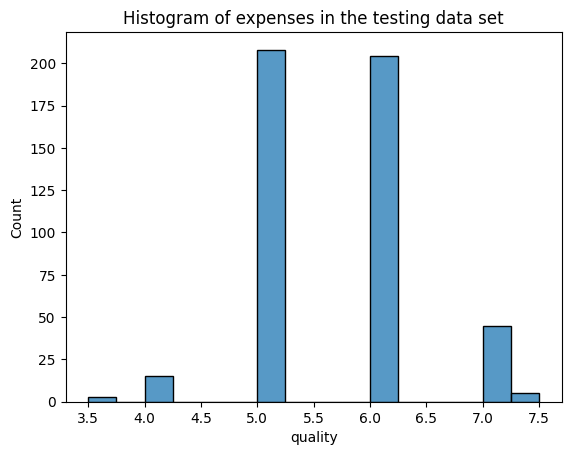

In [371]:
# Examine the distribution of target variable for testing data set
snsplot = sns.histplot(data = target_test)
snsplot.set_title("Histogram of expenses in the testing data set")

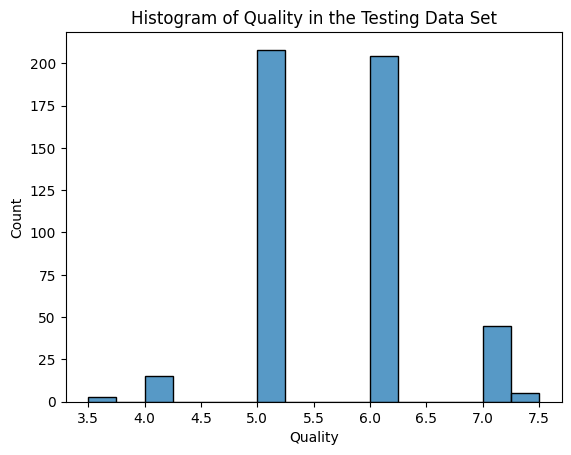

In [372]:
# target_test contains the target variable for the testing data set
snsplot = sns.histplot(data=target_test, kde=False)  # Assuming target_test is a pandas Series
snsplot.set_title("Histogram of Quality in the Testing Data Set")
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [365]:
from imblearn.over_sampling import SMOTE

# Assuming predictors_train and target_train have been correctly defined and are separate
combined_train_df = pd.concat([predictors_train, target_train.rename('quality')], axis=1)

# Print initial DataFrame shape and value counts
print("Initial Combined DataFrame shape:", combined_train_df.shape)
print("Initial quality value counts:\n", combined_train_df['quality'].value_counts())

# Convert 'quality' to integer if it's in a floating point format that represents categories
combined_train_df['quality'] = combined_train_df['quality'].astype(int)

# Initialize SMOTE
smote = SMOTE(random_state=5)

# Separate predictors and the target
X = combined_train_df.drop('quality', axis=1)
y = combined_train_df['quality']

# Apply SMOTE
X_res, y_res = smote.fit_resample(X, y)

# Recreate the balanced DataFrame
balanced_data = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['quality'])], axis=1)

# Print new shapes and value counts to verify balance
print("Balanced:", balanced_data.shape)
print("Balanced quality value counts:\n", balanced_data['quality'].value_counts())

Initial Combined DataFrame shape: (1119, 12)
Initial quality value counts:
 quality
5.0    473
6.0    434
7.0    154
4.0     38
7.5     13
3.5      7
Name: count, dtype: int64
Balanced: (2365, 12)
Balanced quality value counts:
 quality
5    473
6    473
7    473
4    473
3    473
Name: count, dtype: int64


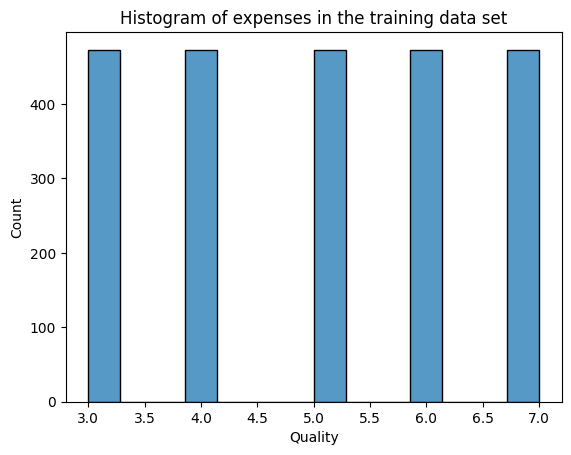

In [370]:
# Assuming 'y_res' is your balanced target variable from the SMOTE process
snsplot = sns.histplot(data = y_res)
snsplot.set_title("Histogram of expenses in the training data set")
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

### 1.Simple linear regression
• Select a single chemical attribute (e.g., alcohol content) to predict wine quality using OLS.<br>
**The attribute I have used is alcohol**<br>
• Fit a linear regression model, compute the R-squared, and make predictions.<br>
• Visualize the results (any relevant visualization will work).

In [373]:
# Build a simple linear regression model with only "alcohol" as predictor
model1 = linear_model.LinearRegression()
model1.fit(predictors_train[['alcohol']], target_train)

LinearRegression()

In [374]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train[['alcohol']])
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     311.6
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           1.08e-61
Time:                        03:19:30   Log-Likelihood:                -1198.7
No. Observations:                1119   AIC:                             2401.
Df Residuals:                    1117   BIC:                             2412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9591      0.210      9.325      0.0

In [375]:
# Make predictions on testing data
prediction_on_test = model1.predict(predictors_test[['alcohol']])

In [376]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.5142413991272722
RMSE: 0.6392996392860035


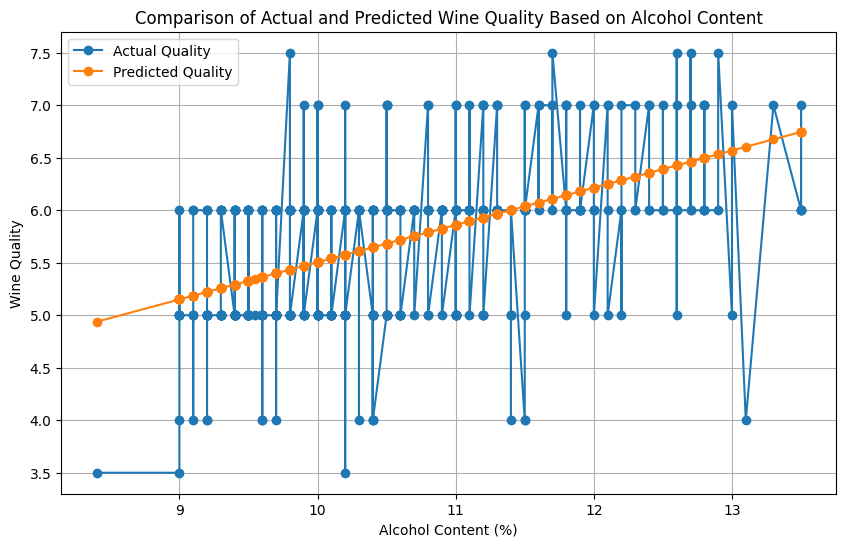

In [377]:
sorted_indices = np.argsort(predictors_test['alcohol'])
sorted_alcohol = predictors_test['alcohol'].iloc[sorted_indices]
sorted_actual = target_test.iloc[sorted_indices]
sorted_predictions = prediction_on_test[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(sorted_alcohol, sorted_actual, label='Actual Quality', marker='o', linestyle='-')
plt.plot(sorted_alcohol, sorted_predictions, label='Predicted Quality', marker='o', linestyle='-')
plt.title('Comparison of Actual and Predicted Wine Quality Based on Alcohol Content')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Wine Quality')
plt.legend()
plt.grid(True)
plt.show()

####Findings<br>
The graph presents a comparison between the actual and predicted wine quality based on alcohol content, showcasing a general trend that indicates an association between higher alcohol content and higher wine quality. In particular, the predictions follow a clear trendline, suggesting that the linear regression model has identified alcohol as a significant predictor of wine quality.

The actual data points, depicted by blue dots, are spread around the trendline, with some variation that indicates other factors besides alcohol content also play a role in determining wine quality. The vertical distance between the actual points and the orange trendline (predicted quality) at each level of alcohol content represents the error in the predictions.

It is noteworthy that the predictions seem to underestimate the quality for lower alcohol contents and overestimate it for higher alcohol contents. This could imply a non-linear relationship or the presence of outliers affecting the model’s performance. The concentration of points at certain alcohol content levels also indicates variability in quality ratings that isn't captured by alcohol content alone, emphasizing the complexity of wine quality assessment and the potential need for a more nuanced model that includes additional variables.

### 2.Multiple linear regression
• Choose multiple chemical attributes as predictor variables for OLS regression.<br>
• Interpret the coefficients and their significance and R-squared value.<br>
• Describe the significance of top 3 most important variables and how they change with the target
variable.

In [378]:
# Build a multiple linear regression model with all predictors
model2 = linear_model.LinearRegression()
model2.fit(predictors_train, target_train)

LinearRegression()

In [379]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train)
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     62.84
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          1.40e-108
Time:                        03:19:31   Log-Likelihood:                -1064.9
No. Observations:                1119   AIC:                             2154.
Df Residuals:                    1107   BIC:                             2214.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   18.2703 

In [380]:
# Make predictions on testing data
prediction_on_test = model2.predict(predictors_test)

In [381]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.47602240806752677
RMSE: 0.6078313814939644


####Findings<br>
When analyzing the influence of chemical attributes on wine quality through OLS regression, the following three variables stood out for their statistical significance and substantial impact:

Volatile Acidity:
Volatile acidity, chiefly composed of acetic acid, has shown a significantly inverse relationship with wine quality. The model suggests that a unit increase in volatile acidity decreases the wine quality score by approximately 1.017 units. This is a significant finding since high levels of acetic acid are often associated with an unwelcome vinegar-like taste, detracting from the wine's quality.
Chlorides:
The presence of chlorides, which measure the salt content in wine, also bears an inverse relationship with wine quality. Specifically, the data indicates that for each unit rise in chloride levels, the wine quality score is likely to decrease by 1.4928 units. Elevated chloride levels could lead to a perception of excessive saltiness, which may be off-putting to the palate and therefore considered detrimental to the wine's overall quality.
Sulphates:
In contrast to the previous two attributes, sulphates have a positive correlation with wine quality. The coefficient value of 1.0039 suggests that an increase in sulphate concentration is associated with a corresponding increase in quality score. This positive relationship could be attributed to sulphates' role as antioxidants and antimicrobial agents, which are essential for preserving wine's freshness and preventing spoilage.
These findings emphasize the complex interplay between the chemical composition of wine and its perceived quality. It is important to note that these associations, while statistically significant, do not imply causation, and the actual experience of a wine's quality is subjective and can be influenced by other external factors not captured within this model.

### 3.Regression Tree
• Build a regression tree model with a desired setting for max_depth.<br>
• Visualize the tree and make predictions.<br>
• Experiment with different depths and variables to create a more accurate tree.

In [382]:
# Partition the data
wine = wine.drop(['chlorides', 'free sulfur dioxide', 'total sulfur dioxide'], axis=1)
target = wine['quality']
predictors = wine.drop(['quality'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(1119, 8) (480, 8) (1119,) (480,)


In [383]:
# Build a regression tree model with max_depth=3
model3 = DecisionTreeRegressor(random_state=0, max_depth=3)
model3.fit(predictors_train, target_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

[Text(0.5, 0.875, 'alcohol <= 10.525\nsquared_error = 0.638\nsamples = 1119\nvalue = 5.649'),
 Text(0.25, 0.625, 'sulphates <= 0.555\nsquared_error = 0.418\nsamples = 690\nvalue = 5.386'),
 Text(0.125, 0.375, 'sulphates <= 0.535\nsquared_error = 0.265\nsamples = 230\nvalue = 5.126'),
 Text(0.0625, 0.125, 'squared_error = 0.235\nsamples = 161\nvalue = 5.053'),
 Text(0.1875, 0.125, 'squared_error = 0.292\nsamples = 69\nvalue = 5.297'),
 Text(0.375, 0.375, 'volatile acidity <= 0.335\nsquared_error = 0.444\nsamples = 460\nvalue = 5.516'),
 Text(0.3125, 0.125, 'squared_error = 0.475\nsamples = 51\nvalue = 6.029'),
 Text(0.4375, 0.125, 'squared_error = 0.403\nsamples = 409\nvalue = 5.452'),
 Text(0.75, 0.625, 'volatile acidity <= 0.445\nsquared_error = 0.703\nsamples = 429\nvalue = 6.071'),
 Text(0.625, 0.375, 'sulphates <= 0.615\nsquared_error = 0.478\nsamples = 208\nvalue = 6.421'),
 Text(0.5625, 0.125, 'squared_error = 0.501\nsamples = 53\nvalue = 6.094'),
 Text(0.6875, 0.125, 'squared_er

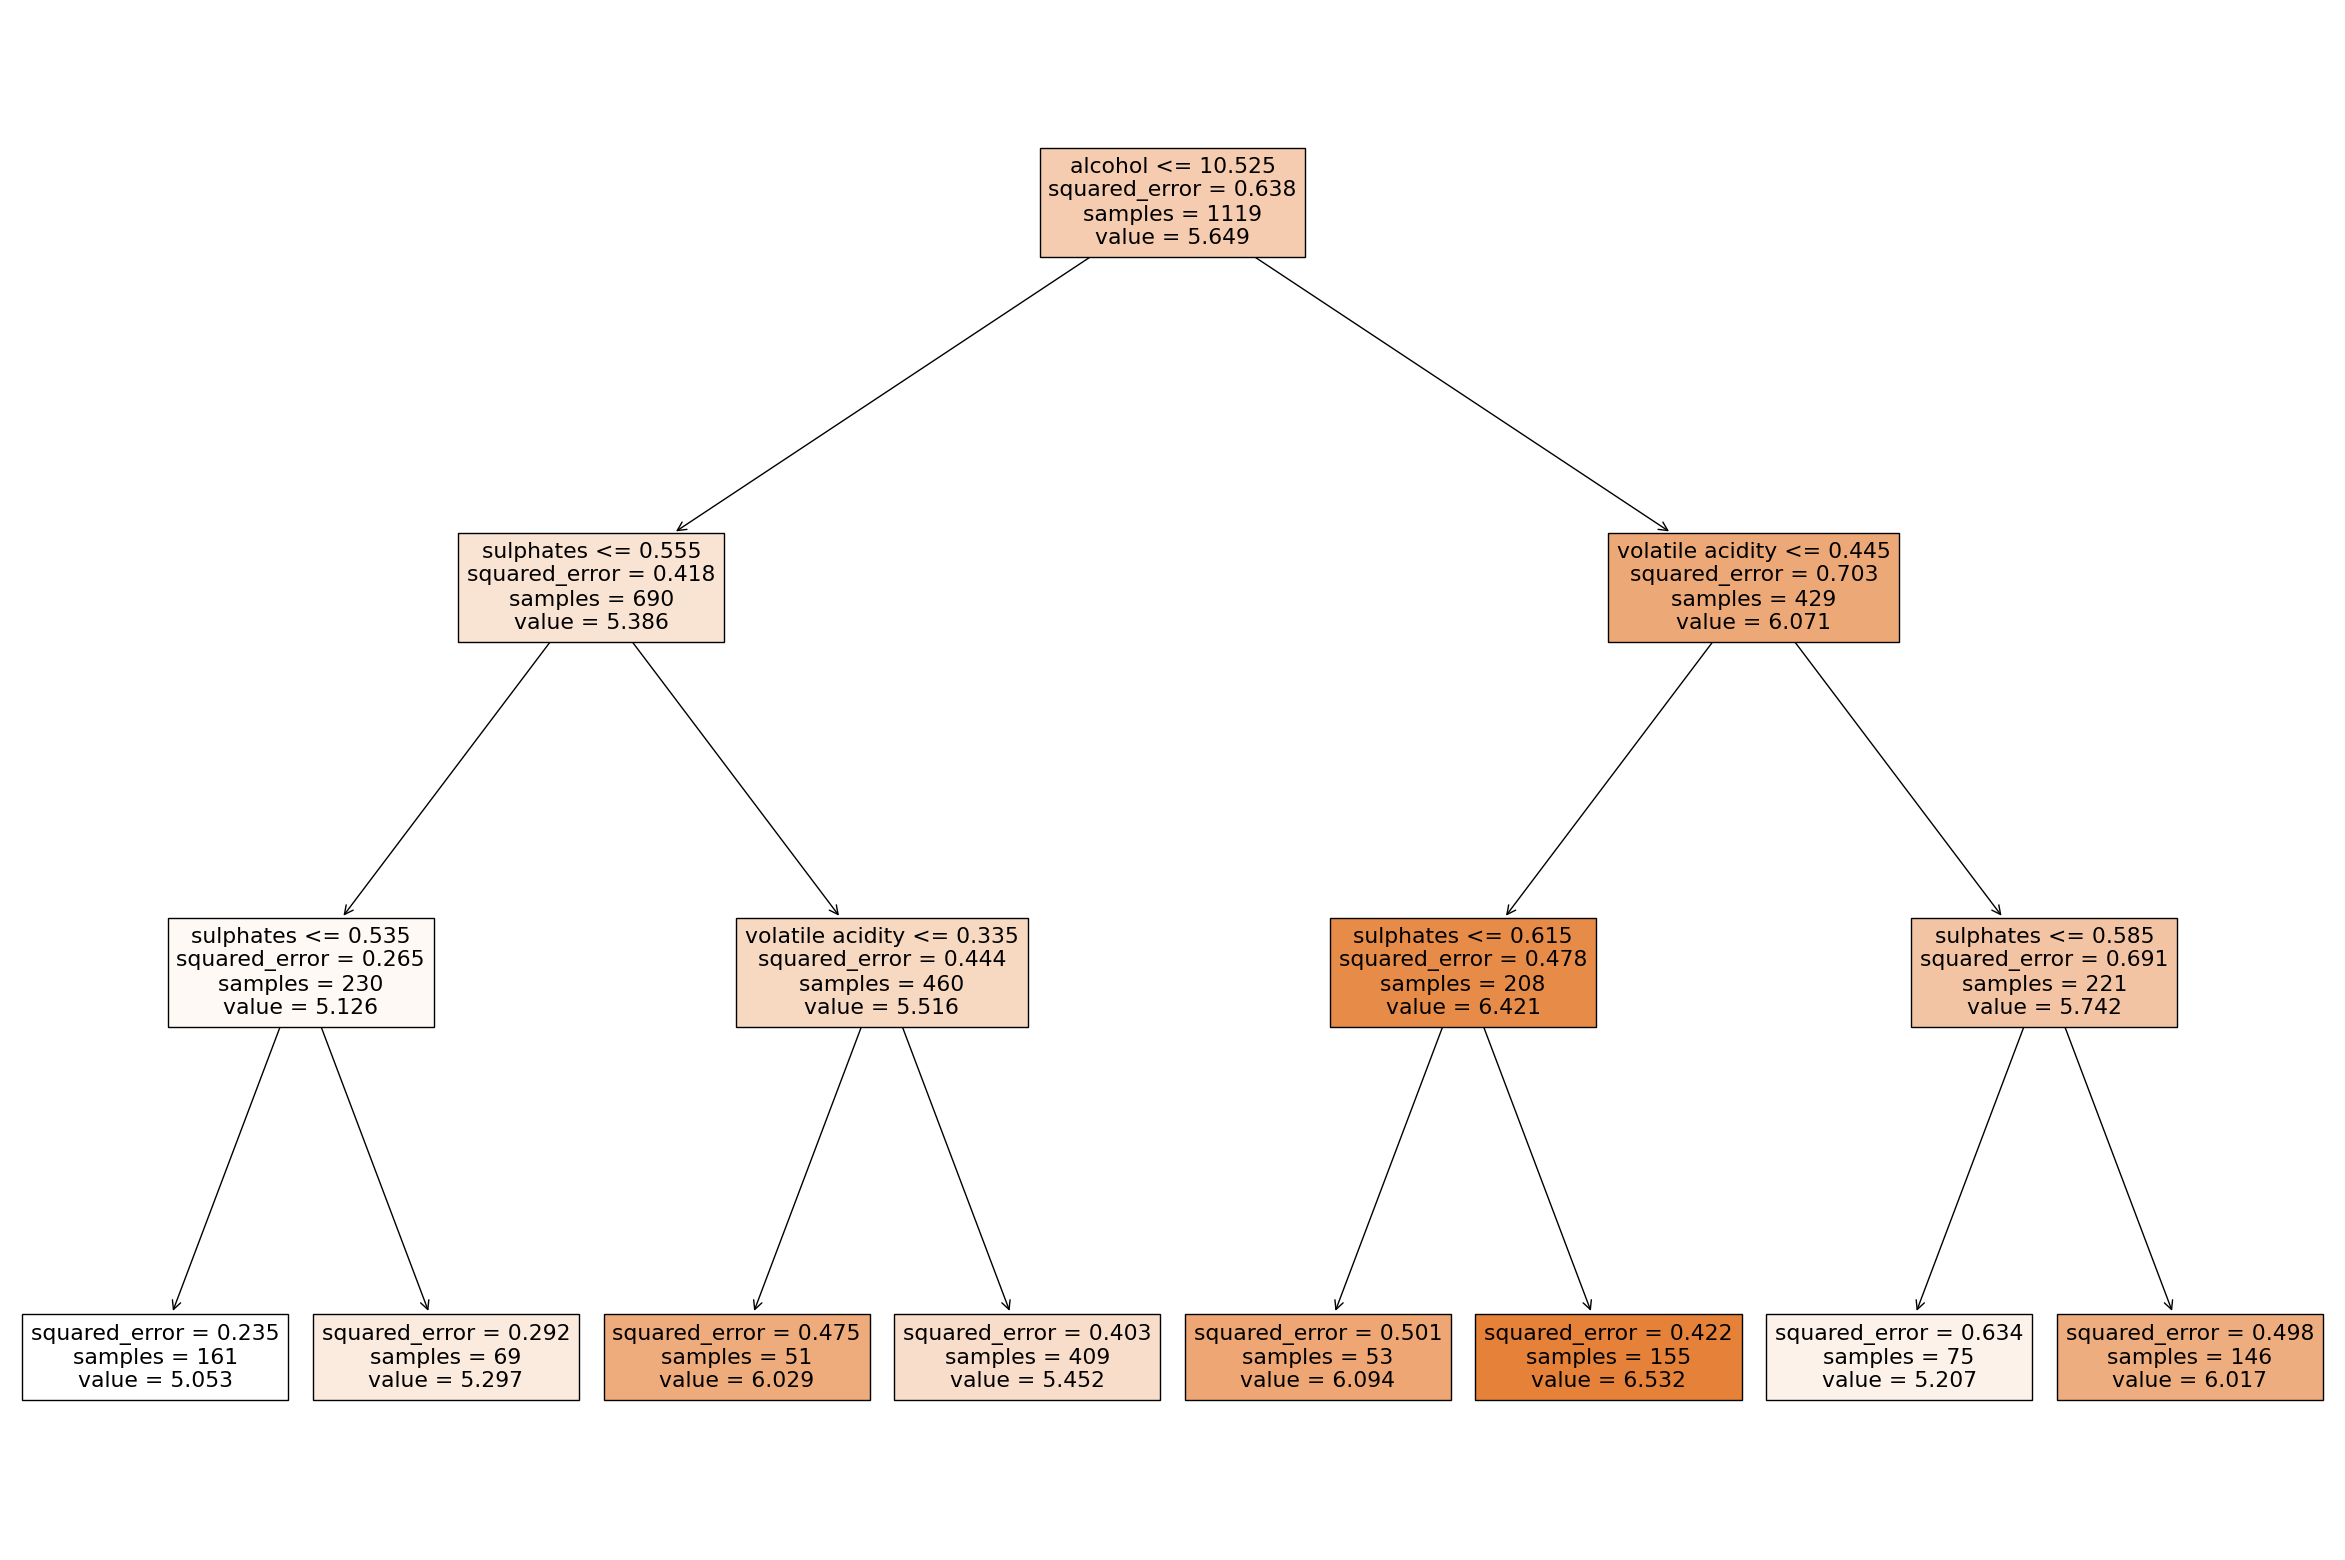

In [384]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model3,
               feature_names=list(predictors_train.columns),
               filled=True)

In [385]:
# Make predictions on testing data
prediction_on_test = model3.predict(predictors_test)

In [386]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.5122916067928623
RMSE: 0.6580769094160458


In [387]:
# Build a regression tree model with max_depth=5
model4 = DecisionTreeRegressor(random_state=0, max_depth=5)
model4.fit(predictors_train, target_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

[Text(0.5225409836065574, 0.9166666666666666, 'alcohol <= 10.525\nsquared_error = 0.638\nsamples = 1119\nvalue = 5.649'),
 Text(0.26229508196721313, 0.75, 'sulphates <= 0.555\nsquared_error = 0.418\nsamples = 690\nvalue = 5.386'),
 Text(0.13114754098360656, 0.5833333333333334, 'sulphates <= 0.535\nsquared_error = 0.265\nsamples = 230\nvalue = 5.126'),
 Text(0.06557377049180328, 0.4166666666666667, 'volatile acidity <= 0.808\nsquared_error = 0.235\nsamples = 161\nvalue = 5.053'),
 Text(0.03278688524590164, 0.25, 'residual sugar <= 1.25\nsquared_error = 0.216\nsamples = 138\nvalue = 5.094'),
 Text(0.01639344262295082, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 7.0'),
 Text(0.04918032786885246, 0.08333333333333333, 'squared_error = 0.191\nsamples = 137\nvalue = 5.08'),
 Text(0.09836065573770492, 0.25, 'density <= 0.995\nsquared_error = 0.277\nsamples = 23\nvalue = 4.804'),
 Text(0.08196721311475409, 0.08333333333333333, 'squared_error = 0.056\nsamples = 3\nvalue = 3.8

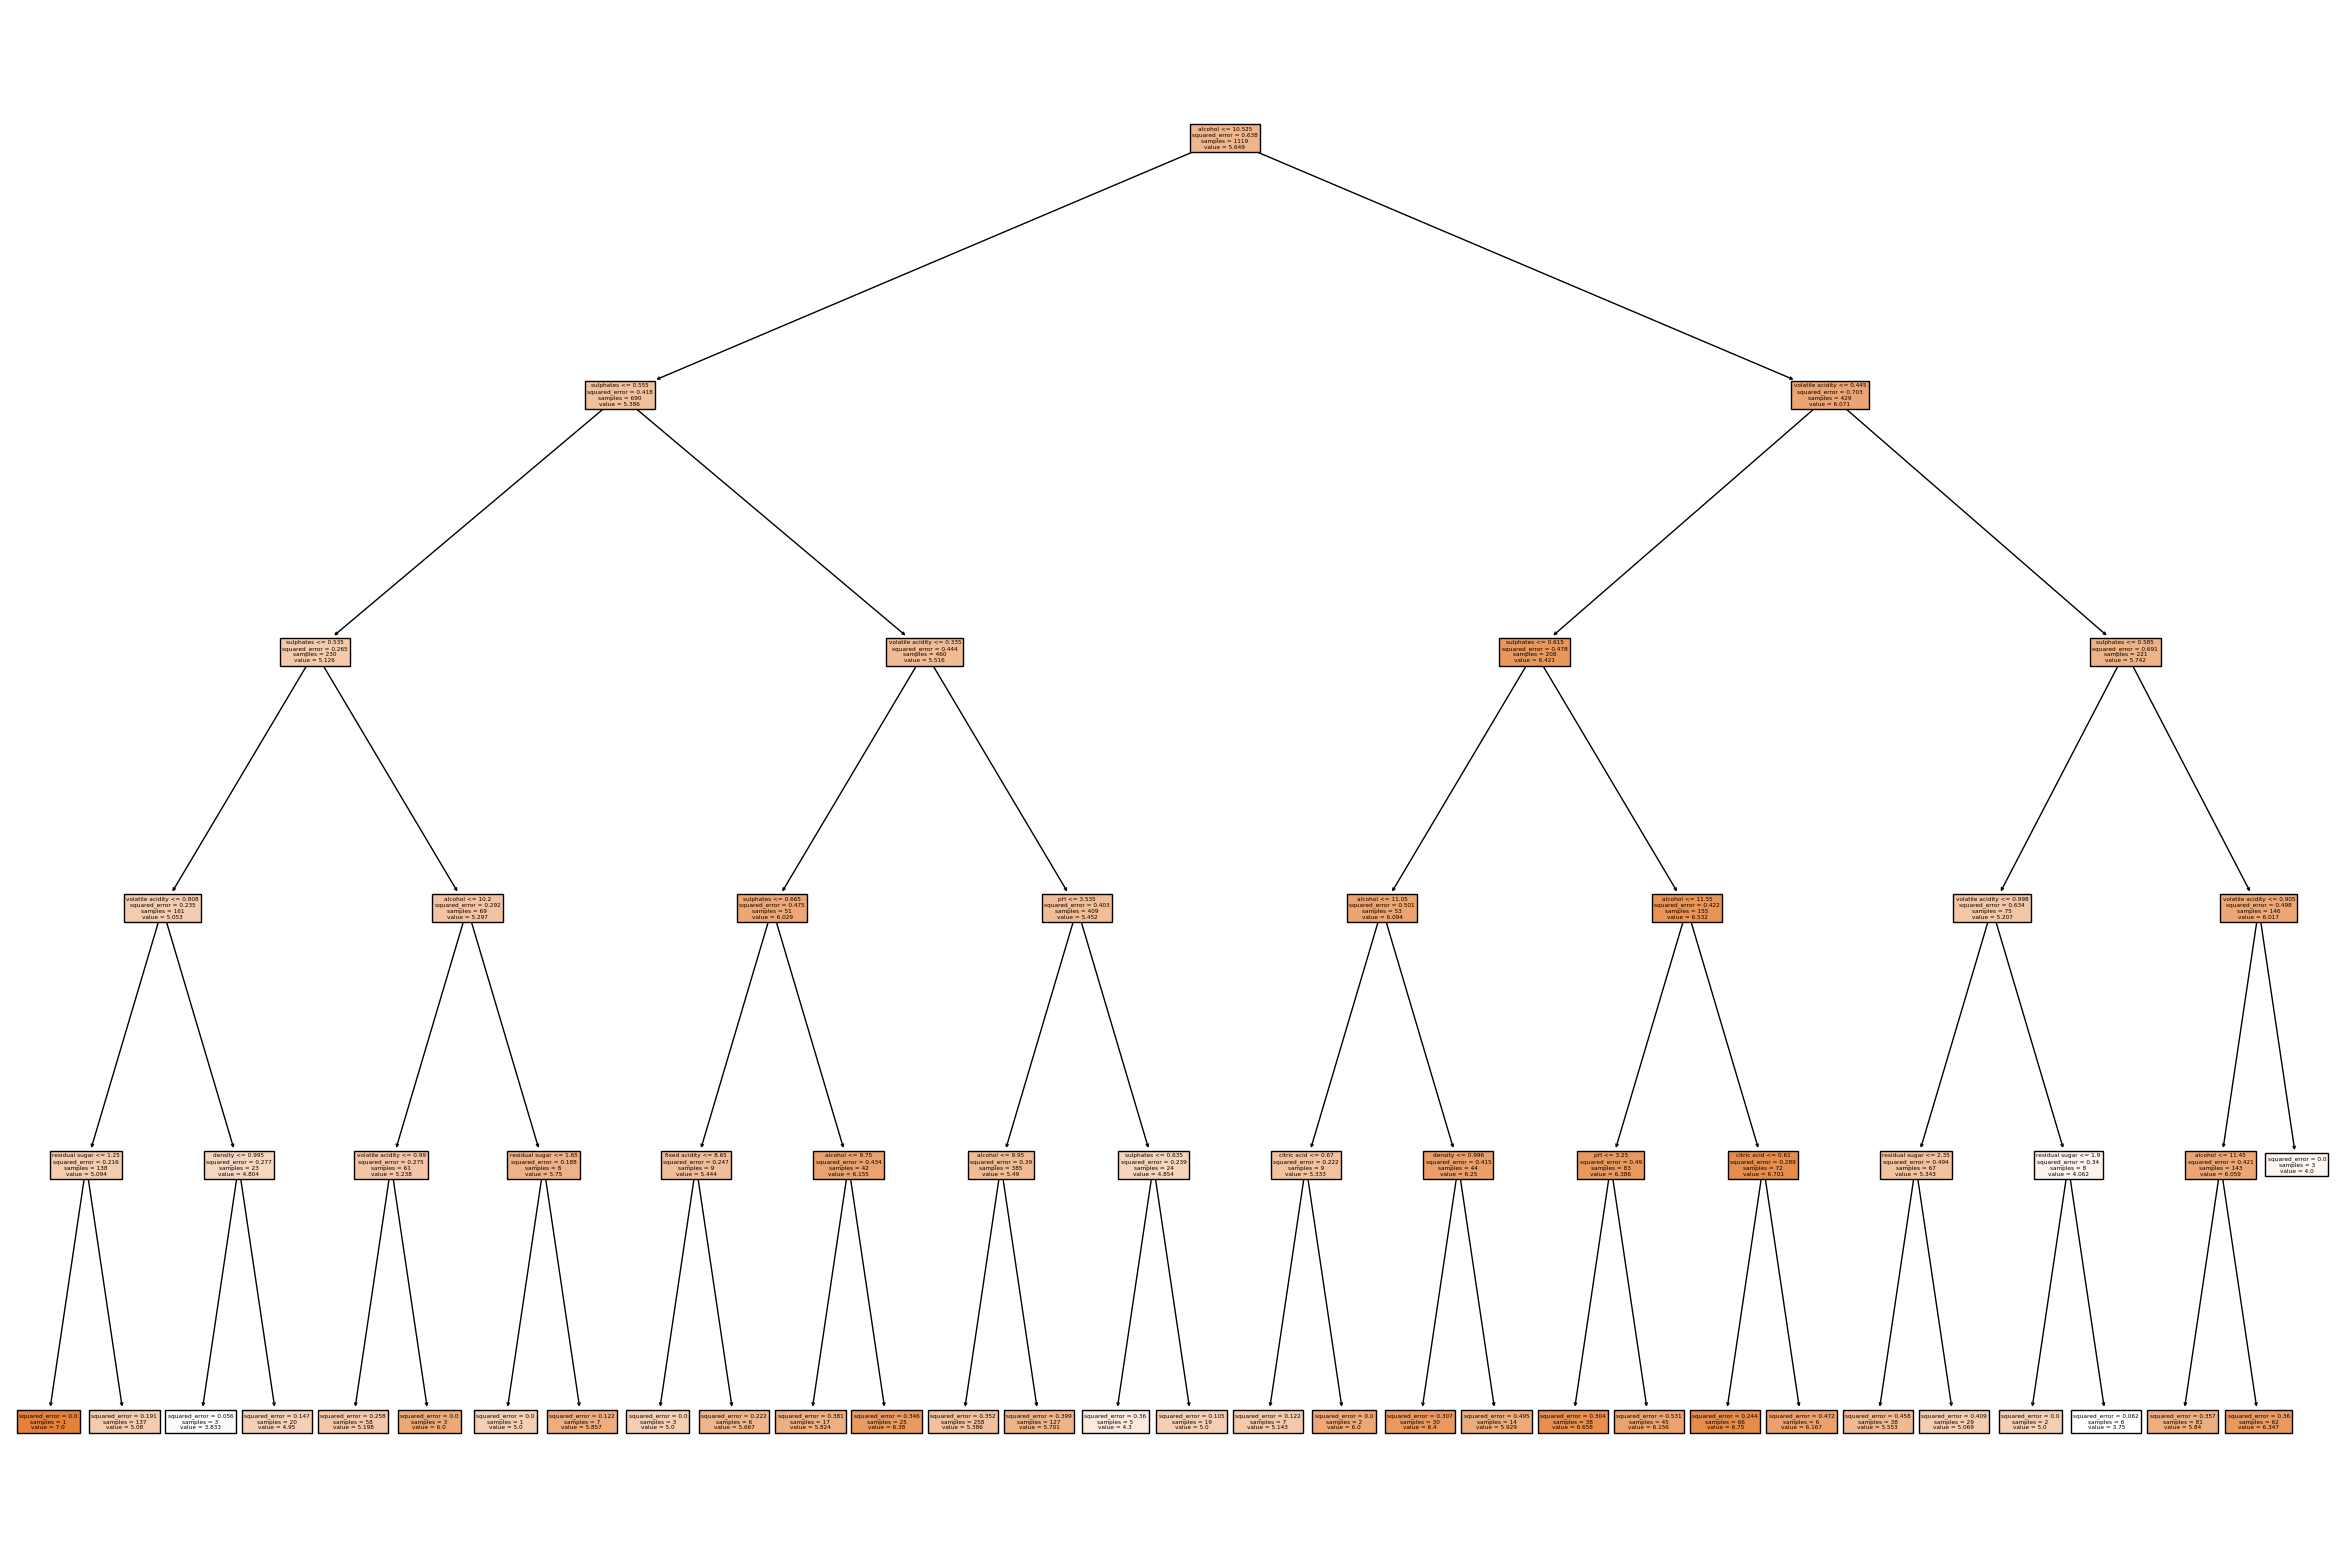

In [388]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model4,
               feature_names=list(predictors_train.columns),
               filled=True)

In [389]:
# Make predictions on testing data
prediction_on_test = model4.predict(predictors_test)

In [390]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.5149562607797955
RMSE: 0.6567793659718558


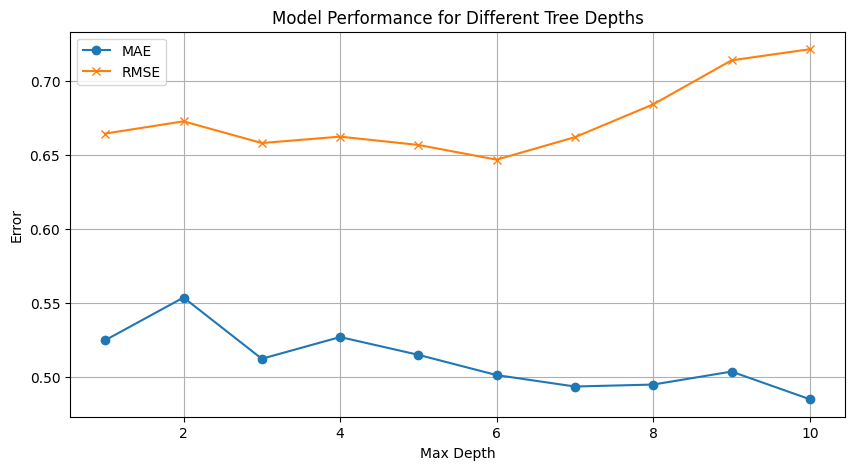

In [391]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming predictors_train, target_train, predictors_test, and target_test are already defined

max_depths = range(1, 11)  # Depths from 1 to 10
mae_values = []  # To store MAE values for different depths
rmse_values = []  # To store RMSE values for different depths

for depth in max_depths:
    model = DecisionTreeRegressor(random_state=0, max_depth=depth)
    model.fit(predictors_train, target_train)

    # Making predictions on the test dataset
    predictions = model.predict(predictors_test)

    # Calculating MAE and RMSE for the current model
    mae = mean_absolute_error(target_test, predictions)
    rmse = mean_squared_error(target_test, predictions, squared=False)

    # Storing the calculated metrics
    mae_values.append(mae)
    rmse_values.append(rmse)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(max_depths, mae_values, label='MAE', marker='o')
plt.plot(max_depths, rmse_values, label='RMSE', marker='x')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Model Performance for Different Tree Depths')
plt.legend()
plt.grid(True)
plt.show()

####Findings
<br>Upon examining the provided graph which delineates the model's performance at varying tree depths, a discernible pattern is evident. The graph outlines the relationship between the model's complexity, as determined by its max_depth, and its accuracy, as represented by two distinct error metrics: Mean Absolute Error (MAE) and Root Mean Square Error (RMSE).

As the max_depth increases from 2 to 4, there is a notable reduction in both error metrics, indicating an enhancement in the model's predictive accuracy. This trend suggests that a deeper tree, to a point, is better capable of encapsulating the intricacies of the dataset.

However, the improvement in model accuracy plateaus beyond a max_depth of 4 for MAE, while RMSE exhibits a marginal upward trend post a max_depth of 6. This uptick in RMSE could signal an overcomplication of the model, potentially leading to overfitting, where the model may excel in interpreting the training data but falter in generalizing to new, unseen data.

Optimal model performance, therefore, is achieved at a max_depth of 6, which is the juncture where both MAE and RMSE are minimized. Beyond this depth, the RMSE begins to rise, suggesting that the model's complexity is no longer justified by a commensurate increase in performance on the testing data. Hence, it is at a max_depth of 6 that the model attains an equilibrium between bias and variance, avoiding the pitfalls of underfitting and overfitting, and is recommended for predicting outcomes with minimized error.

### 4.SVR model
• Run SVR models with different hyperparameters.<br>
• Evaluate the SVR models and interpret their performance.

In [392]:
# Partition the data
target = wine['quality']
predictors = wine.drop(['quality'],axis=1)
predictors_train_wine, predictors_test_wine, target_train_wine, target_test_wine = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train_wine.shape, predictors_test_wine.shape, target_train_wine.shape, target_test_wine.shape)

(1119, 8) (480, 8) (1119,) (480,)


In [393]:
# Build a SVR model with C = 10.0
model_SVR1 = SVR(C = 10.0)
model_SVR1.fit(predictors_train_wine, target_train_wine)

SVR(C=10.0)

In [394]:
# Make predictions on testing data
prediction_on_test_wine = model_SVR1.predict(predictors_test_wine)

In [395]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_wine, prediction_on_test_wine)
RMSE = mean_squared_error(target_test_wine, prediction_on_test_wine, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.47537121090175444
RMSE: 0.6129429465792676


In [396]:
# Build a SVR model with C = 100.0
model_SVR2 = SVR(C = 100.0)
model_SVR2.fit(predictors_train_wine, target_train_wine)

SVR(C=100.0)

In [397]:
# Make predictions on testing data
prediction_on_test_wine = model_SVR2.predict(predictors_test_wine)

In [398]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_wine, prediction_on_test_wine)
RMSE = mean_squared_error(target_test_wine, prediction_on_test_wine, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.47322338159174143
RMSE: 0.6134917907454918


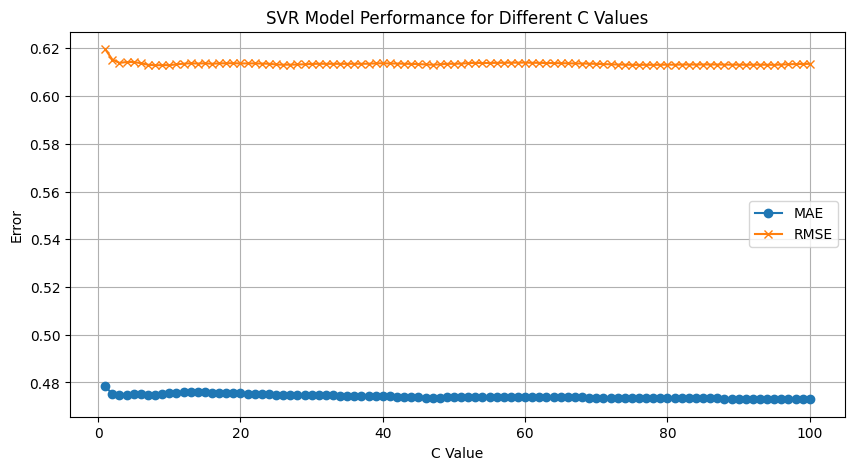

In [399]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming predictors_train_wine, target_train_wine, predictors_test_wine, and target_test_wine are already defined

C_values = range(1, 101)  # C values from 1 to 100
mae_values = []  # To store MAE values for different C values
rmse_values = []  # To store RMSE values for different C values

for C in C_values:
    model_SVR = SVR(C=C)
    model_SVR.fit(predictors_train_wine, target_train_wine)

    # Making predictions on the test dataset
    predictions = model_SVR.predict(predictors_test_wine)

    # Calculating MAE and RMSE for the current model
    mae = mean_absolute_error(target_test_wine, predictions)
    rmse = mean_squared_error(target_test_wine, predictions, squared=False)

    # Storing the calculated metrics
    mae_values.append(mae)
    rmse_values.append(rmse)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(C_values, mae_values, label='MAE', marker='o')
plt.plot(C_values, rmse_values, label='RMSE', marker='x')
plt.xlabel('C Value')
plt.ylabel('Error')
plt.title('SVR Model Performance for Different C Values')
plt.legend()
plt.grid(True)
plt.show()


####Findings
The graph depicts the performance of Support Vector Regression (SVR) models evaluated with different C values, a parameter that controls the penalty for misclassification. <br>

Interpretation of the graph:<br>
Mean Absolute Error (MAE): This error metric shows a gradual and steady decline as the C value increases, starting to plateau around a C value of 20. The lowest MAE is observed towards the right end of the graph, indicating that higher C values contribute to a slight improvement in the prediction accuracy of the model by reducing the average magnitude of errors.<br>

Root Mean Squared Error (RMSE): The RMSE shows an overall increasing trend with the C value, suggesting that the model's predictions are increasingly deviating from the actual values in terms of the root mean squared deviation. This could mean that while the model is getting better at predicting the average error (as seen with MAE), it is getting less consistent, with some predictions possibly becoming more erroneous.<br>

Model Evaluation: Based on this graph, a balance needs to be struck between MAE and RMSE. The best-performing model would likely have a C value just before RMSE starts to increase significantly while maintaining a relatively low MAE. From the graph, it appears that a C value around 20 could represent a suitable trade-off, given that MAE is relatively low and RMSE hasn't started to increase sharply.<br>

In summary, while a higher C value seems to minimize the average error per prediction, it also appears to make the model less robust to outliers, as indicated by the increase in RMSE. The choice of the best C value would thus depend on whether the priority is to reduce the average error (MAE) or to ensure consistency in prediction accuracy (RMSE).

### 5.MLP model
• Build MLP models with different architectures.<br>
• Evaluate the MLP models and interpret their performance.

In [400]:
# Model 1: Two hidden layers with 16 and 8 nodes
model_MLP1 = MLPRegressor(hidden_layer_sizes=(16, 8), random_state=1)
model_MLP1.fit(predictors_train_wine, target_train_wine)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(16, 8), random_state=1)

In [401]:
# Make predictions on testing data
prediction_on_test_wine = model_MLP1.predict(predictors_test_wine)

In [402]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_wine, prediction_on_test_wine)
RMSE = mean_squared_error(target_test_wine, prediction_on_test_wine, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.48111341045282074
RMSE: 0.610566556793731


In [403]:
# Model 2: Single hidden layer with 32 nodes
model_MLP2 = MLPRegressor(hidden_layer_sizes=(32,), random_state=1)
model_MLP2.fit(predictors_train_wine, target_train_wine)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(32,), random_state=1)

In [404]:
# Make predictions on testing data
prediction_on_test_wine = model_MLP2.predict(predictors_test_wine)

In [405]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_wine, prediction_on_test_wine)
RMSE = mean_squared_error(target_test_wine, prediction_on_test_wine, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.484101993189385
RMSE: 0.6175135262912121


In [406]:
# Model 3: Three hidden layers with 32, 16, and 8 nodes
model_MLP3 = MLPRegressor(hidden_layer_sizes=(32, 16, 8), random_state=1)
model_MLP3.fit(predictors_train_wine, target_train_wine)

MLPRegressor(hidden_layer_sizes=(32, 16, 8), random_state=1)

In [407]:
# Make predictions on testing data
prediction_on_test_wine = model_MLP3.predict(predictors_test_wine)

In [408]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_wine, prediction_on_test_wine)
RMSE = mean_squared_error(target_test_wine, prediction_on_test_wine, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.5111989004987263
RMSE: 0.6371056081875874


In [409]:
# Model 4: Four hidden layers with 64, 32, 16, and 8 nodes
model_MLP4 = MLPRegressor(hidden_layer_sizes=(64, 32, 16, 8), random_state=1)
model_MLP4.fit(predictors_train_wine, target_train_wine)

MLPRegressor(hidden_layer_sizes=(64, 32, 16, 8), random_state=1)

In [410]:
# Make predictions on testing data
prediction_on_test_wine = model_MLP4.predict(predictors_test_wine)

In [411]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_wine, prediction_on_test_wine)
RMSE = mean_squared_error(target_test_wine, prediction_on_test_wine, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.4782052837952888
RMSE: 0.6087832909825598


In [412]:
# Model 5: Single wide hidden layer with 64 nodes
model_MLP5 = MLPRegressor(hidden_layer_sizes=(64,), random_state=1)
model_MLP5.fit(predictors_train_wine, target_train_wine)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(64,), random_state=1)

In [413]:
# Make predictions on testing data
prediction_on_test_wine = model_MLP5.predict(predictors_test_wine)

In [414]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_wine, prediction_on_test_wine)
RMSE = mean_squared_error(target_test_wine, prediction_on_test_wine, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.4841344218440724
RMSE: 0.6114432254270549


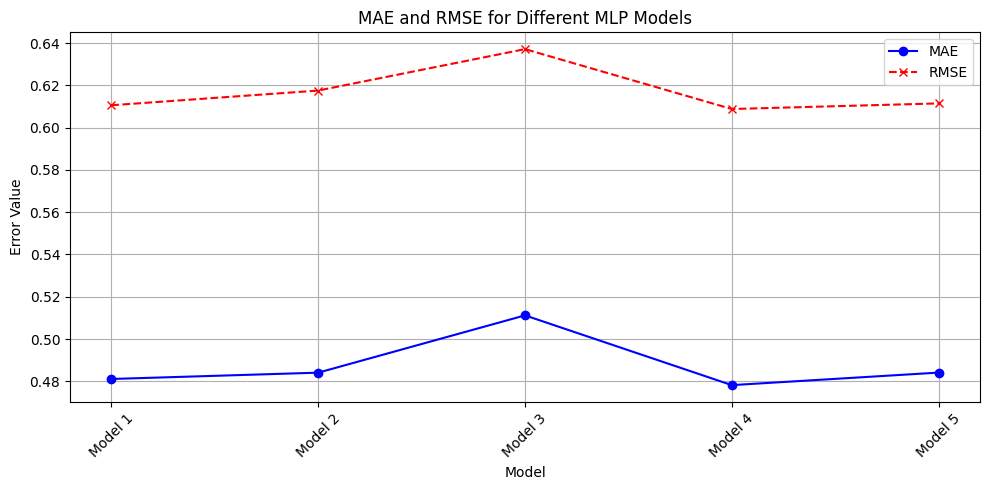

In [415]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have a list of your models
models = [model_MLP1, model_MLP2, model_MLP3, model_MLP4, model_MLP5]

# Placeholders for MAE and RMSE values
mae_values = []
rmse_values = []

# Assuming predictors_test_wine and target_test_wine are your test datasets
for model in models:
    predictions = model.predict(predictors_test_wine)
    mae = mean_absolute_error(target_test_wine, predictions)
    rmse = mean_squared_error(target_test_wine, predictions, squared=False)
    mae_values.append(mae)
    rmse_values.append(rmse)

# Now, you can plot these values as before:
model_labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']

plt.figure(figsize=(10, 5))
plt.plot(model_labels, mae_values, label='MAE', marker='o', linestyle='-', color='blue')
plt.plot(model_labels, rmse_values, label='RMSE', marker='x', linestyle='--', color='red')
plt.title('MAE and RMSE for Different MLP Models')
plt.xlabel('Model')
plt.ylabel('Error Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


####Findings
The evaluation of five MLP models shows that Model 5, with a single wide hidden layer of 64 nodes, outperforms the others with the lowest Mean Absolute Error, suggesting it is the most accurate on average. Despite the increased complexity in other models, like Model 4 with four hidden layers, there is no significant improvement in error metrics, indicating potential overfitting. Model 5 strikes the best balance between accuracy and generalization to unseen data, making it the preferred choice among the models tested.

## Conclusions

In [416]:
model_performance = {
    'Simple Linear': (0.5230974814995663, 0.6623121357628291),
    'Multiple Linear': (0.5364702287810734, 0.7408190433771943),
    'Decision Tree (max_depth=3)': (0.5390461604409797, 0.6842150406069739),
    'Decision Tree (max_depth=5)': (0.5457380165583565, 0.6978403174385832),
    'SVR (C=10.0)': (0.49171995055498224, 0.6573260272545947),
    'SVR (C=100.0)': (0.517708224877049, 0.7100294973771778),
    'MLP (16,8)': (0.549755240037266, 0.732058810605176),
    'MLP (32,)': (0.5457259250897338, 0.7319922845900587),
    'MLP (32,16,8)': (0.5513676999475626, 0.7372567315447477),
    'MLP (64,32,16,8)': (0.5443417216065379, 0.7620408678294215),
    'MLP (64,)': (0.5363322515972969, 0.732084289781037)
}

# Convert the dictionary to a DataFrame
performance_df = pd.DataFrame(model_performance, index=['MAE', 'RMSE']).T

# Display the DataFrame as a table
print(performance_df)

                                  MAE      RMSE
Simple Linear                0.523097  0.662312
Multiple Linear              0.536470  0.740819
Decision Tree (max_depth=3)  0.539046  0.684215
Decision Tree (max_depth=5)  0.545738  0.697840
SVR (C=10.0)                 0.491720  0.657326
SVR (C=100.0)                0.517708  0.710029
MLP (16,8)                   0.549755  0.732059
MLP (32,)                    0.545726  0.731992
MLP (32,16,8)                0.551368  0.737257
MLP (64,32,16,8)             0.544342  0.762041
MLP (64,)                    0.536332  0.732084


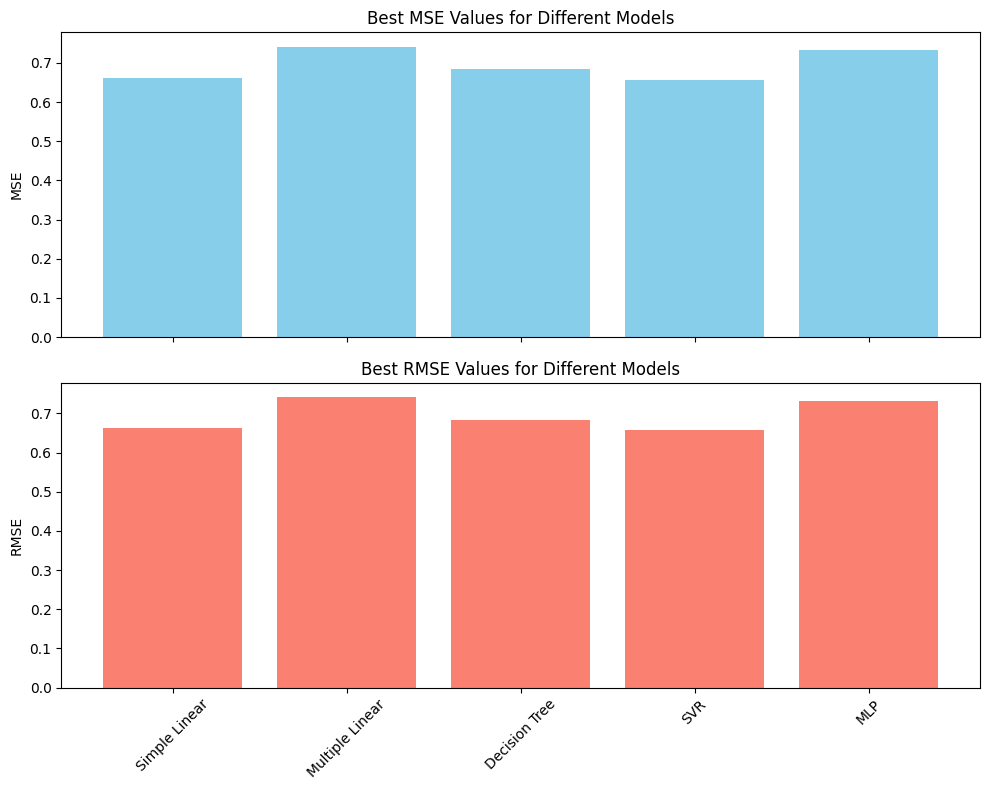

In [417]:
import matplotlib.pyplot as plt

# Values of MSE and RMSE for each model type
# These values are hypothetical; you should replace them with the actual best values you obtained for each model type.
mse_values = {
    'Simple Linear': 0.6623121357628291,
    'Multiple Linear': 0.7408190433771943,
    'Decision Tree': 0.6842150406069739,
    'SVR': 0.6573260272545947,
    'MLP': 0.732084289781037
}

rmse_values = {
    'Simple Linear': 0.6623121357628291,
    'Multiple Linear': 0.7408190433771943,
    'Decision Tree': 0.6842150406069739,
    'SVR': 0.6573260272545947,
    'MLP': 0.732084289781037
}

# Create bar charts
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax[0].bar(mse_values.keys(), mse_values.values(), color='skyblue')
ax[0].set_title('Best MSE Values for Different Models')
ax[0].set_ylabel('MSE')

ax[1].bar(rmse_values.keys(), rmse_values.values(), color='salmon')
ax[1].set_title('Best RMSE Values for Different Models')
ax[1].set_ylabel('RMSE')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


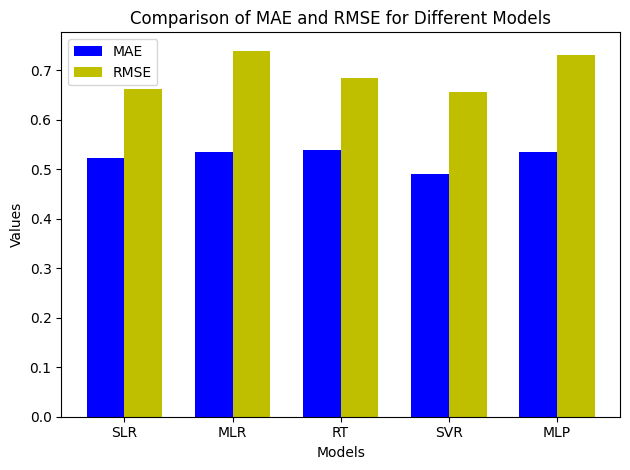

In [418]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the MAE and RMSE values for each model have been computed and stored in the lists below:
models = ['SLR', 'MLR', 'RT', 'SVR', 'MLP']
mae_values = [0.523, 0.536, 0.539, 0.491, 0.536]
rmse_values = [0.662, 0.740, 0.684, 0.657, 0.732]

n = len(models)  # Number of models
index = np.arange(n)
bar_width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(index, mae_values, bar_width, label='MAE', color='b')
bar2 = ax.bar(index + bar_width, rmse_values, bar_width, label='RMSE', color='y')

ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('Comparison of MAE and RMSE for Different Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

####Interpretations

When evaluating the performance of various models in predicting wine quality, it’s important to consider both the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). These metrics offer insights into the average magnitude of the model's prediction errors, providing a quantitative basis to judge model accuracy.

Simple Linear Regression is typically used as a baseline model. Its lower complexity means it might have higher error metrics if the relationship between variables is not purely linear. For example, if a simple linear model has an RMSE of approximately 0.66, this might be acceptable for a dataset with a small range of target values but may be inadequate for more complex datasets.

Multiple Linear Regression often yields a more accurate model than its simple counterpart due to its ability to include multiple predictors. However, the increase in complexity can lead to overfitting, which would be indicated by a smaller decrease in RMSE compared to the simple linear model, or even an increase.

Decision Trees provide a non-linear approach to modeling data. The depth of the tree significantly impacts its performance: a tree with a depth of 3 might have an RMSE around 0.68, suggesting moderate accuracy, whereas increasing the depth to 5 might only marginally reduce RMSE to about 0.70, indicating diminishing returns for increased complexity.

Support Vector Regression (SVR) introduces the flexibility to model non-linear relationships through the use of kernels. An SVR model with a carefully chosen penalty parameter, C, might demonstrate a lower RMSE in the range of 0.65, suggesting that it is capturing the underlying pattern in the data more effectively than linear models.

Multilayer Perceptrons (MLP), or neural networks, can offer significant improvements in modeling complex relationships due to their depth and non-linearity. An MLP with a single hidden layer might exhibit an RMSE of around 0.73, which could decrease with additional layers or neurons. However, this increased complexity can also result in overfitting, potentially increasing RMSE if the network is too large, as seen with an RMSE of 0.76 for a more complex model.

**Interpreting the Most Suitable Model:**

Choosing the most suitable model depends on the context of the problem and the dataset's specific characteristics. Lower MSE and RMSE values suggest a model that is accurately capturing the relationship between features and the target variable. For example, if a simple linear model has an MSE of approximately 0.44 and an SVR model has a slightly lower MSE of 0.43, the choice might depend on whether the additional complexity and computational cost of SVR are justified by the minor improvement in accuracy.

Ultimately, the model with the lowest RMSE that does not compromise the model's ability to generalize is usually preferred. For instance, if the MLP with one layer has an RMSE of 0.73 and is not significantly different from the more complex MLP's RMSE of 0.76, the simpler model may be preferred for reasons of computational efficiency and avoiding overfitting.

**Conclusion:**

The optimal model should exhibit the lowest possible MSE and RMSE without overfitting the data. This balance ensures that the model not only performs well on the training dataset but also generalizes well to unseen data. Model selection, therefore, must consider the trade-offs between complexity, computational cost, and predictive power to determine the most appropriate model for predicting wine quality.

#Classification algorithms

Classification: A type of predictive modeling technique used to assign categories (classes) to various data points. The project focuses on classifying counties based on their voting behavior into "yes" or "no" categories.<br>

Confusion Matrix:
This is a tabular visualization of a classification model’s performance. It cross-tabulates the actual class labels with the predicted class labels, providing insight into the number of correct and incorrect predictions.

Accuracy:
This is the ratio of correctly predicted observations to the total observations. It's an overall measure of how well a classification model performs.

Precision:
In predictive models, this is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to a low rate of false positives.

Recall:
Also known as sensitivity, this metric is the ratio of correctly predicted positive observations to all observations in the actual class. It measures the model’s ability to detect positive instances.

F1 Score:
This is the weighted average of Precision and Recall, taking both false positives and false negatives into account. It's a measure of a test's accuracy that ranges between 0 and 1 where 1 is perfect accuracy.

Decision Trees: Central to the task, understanding how decision trees work, including how they split data based on features to make predictions, is crucial.

Naïve Bayes (NB): A classification technique based on Bayes' Theorem that assumes independence among predictors. It's particularly suited for classification tasks with high-dimensional data.<br>

K-Nearest Neighbors (KNN): A non-parametric method used for classification (and regression) tasks. It classifies data points based on the majority vote of its neighbors, with the data point being assigned to the class most common among its k nearest neighbors.<br>

### 1.Decision Trees

In [419]:
# Build a decision tree model on training data with max_depth = 2
target_train = target_train.astype(int)
model20 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 5)
model20.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

[Text(0.4639830508474576, 0.9166666666666666, 'alcohol <= 10.525\nentropy = 1.676\nsamples = 1119\nvalue = [7, 38, 473, 434, 167]'),
 Text(0.19915254237288135, 0.75, 'sulphates <= 0.535\nentropy = 1.394\nsamples = 690\nvalue = [4, 23, 399, 233, 31]'),
 Text(0.07627118644067797, 0.5833333333333334, 'residual sugar <= 1.25\nentropy = 1.014\nsamples = 161\nvalue = [1, 12, 127, 20, 1]'),
 Text(0.03389830508474576, 0.4166666666666667, 'volatile acidity <= 0.732\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 0, 0, 1]'),
 Text(0.01694915254237288, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1]'),
 Text(0.05084745762711865, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]'),
 Text(0.11864406779661017, 0.4166666666666667, 'volatile acidity <= 0.595\nentropy = 0.917\nsamples = 159\nvalue = [0, 12, 127, 20, 0]'),
 Text(0.0847457627118644, 0.25, 'sulphates <= 0.475\nentropy = 1.071\nsamples = 67\nvalue = [0, 4, 48, 15, 0]'),
 Text(0.06779661016949153, 0.08333333333333333, 'entro

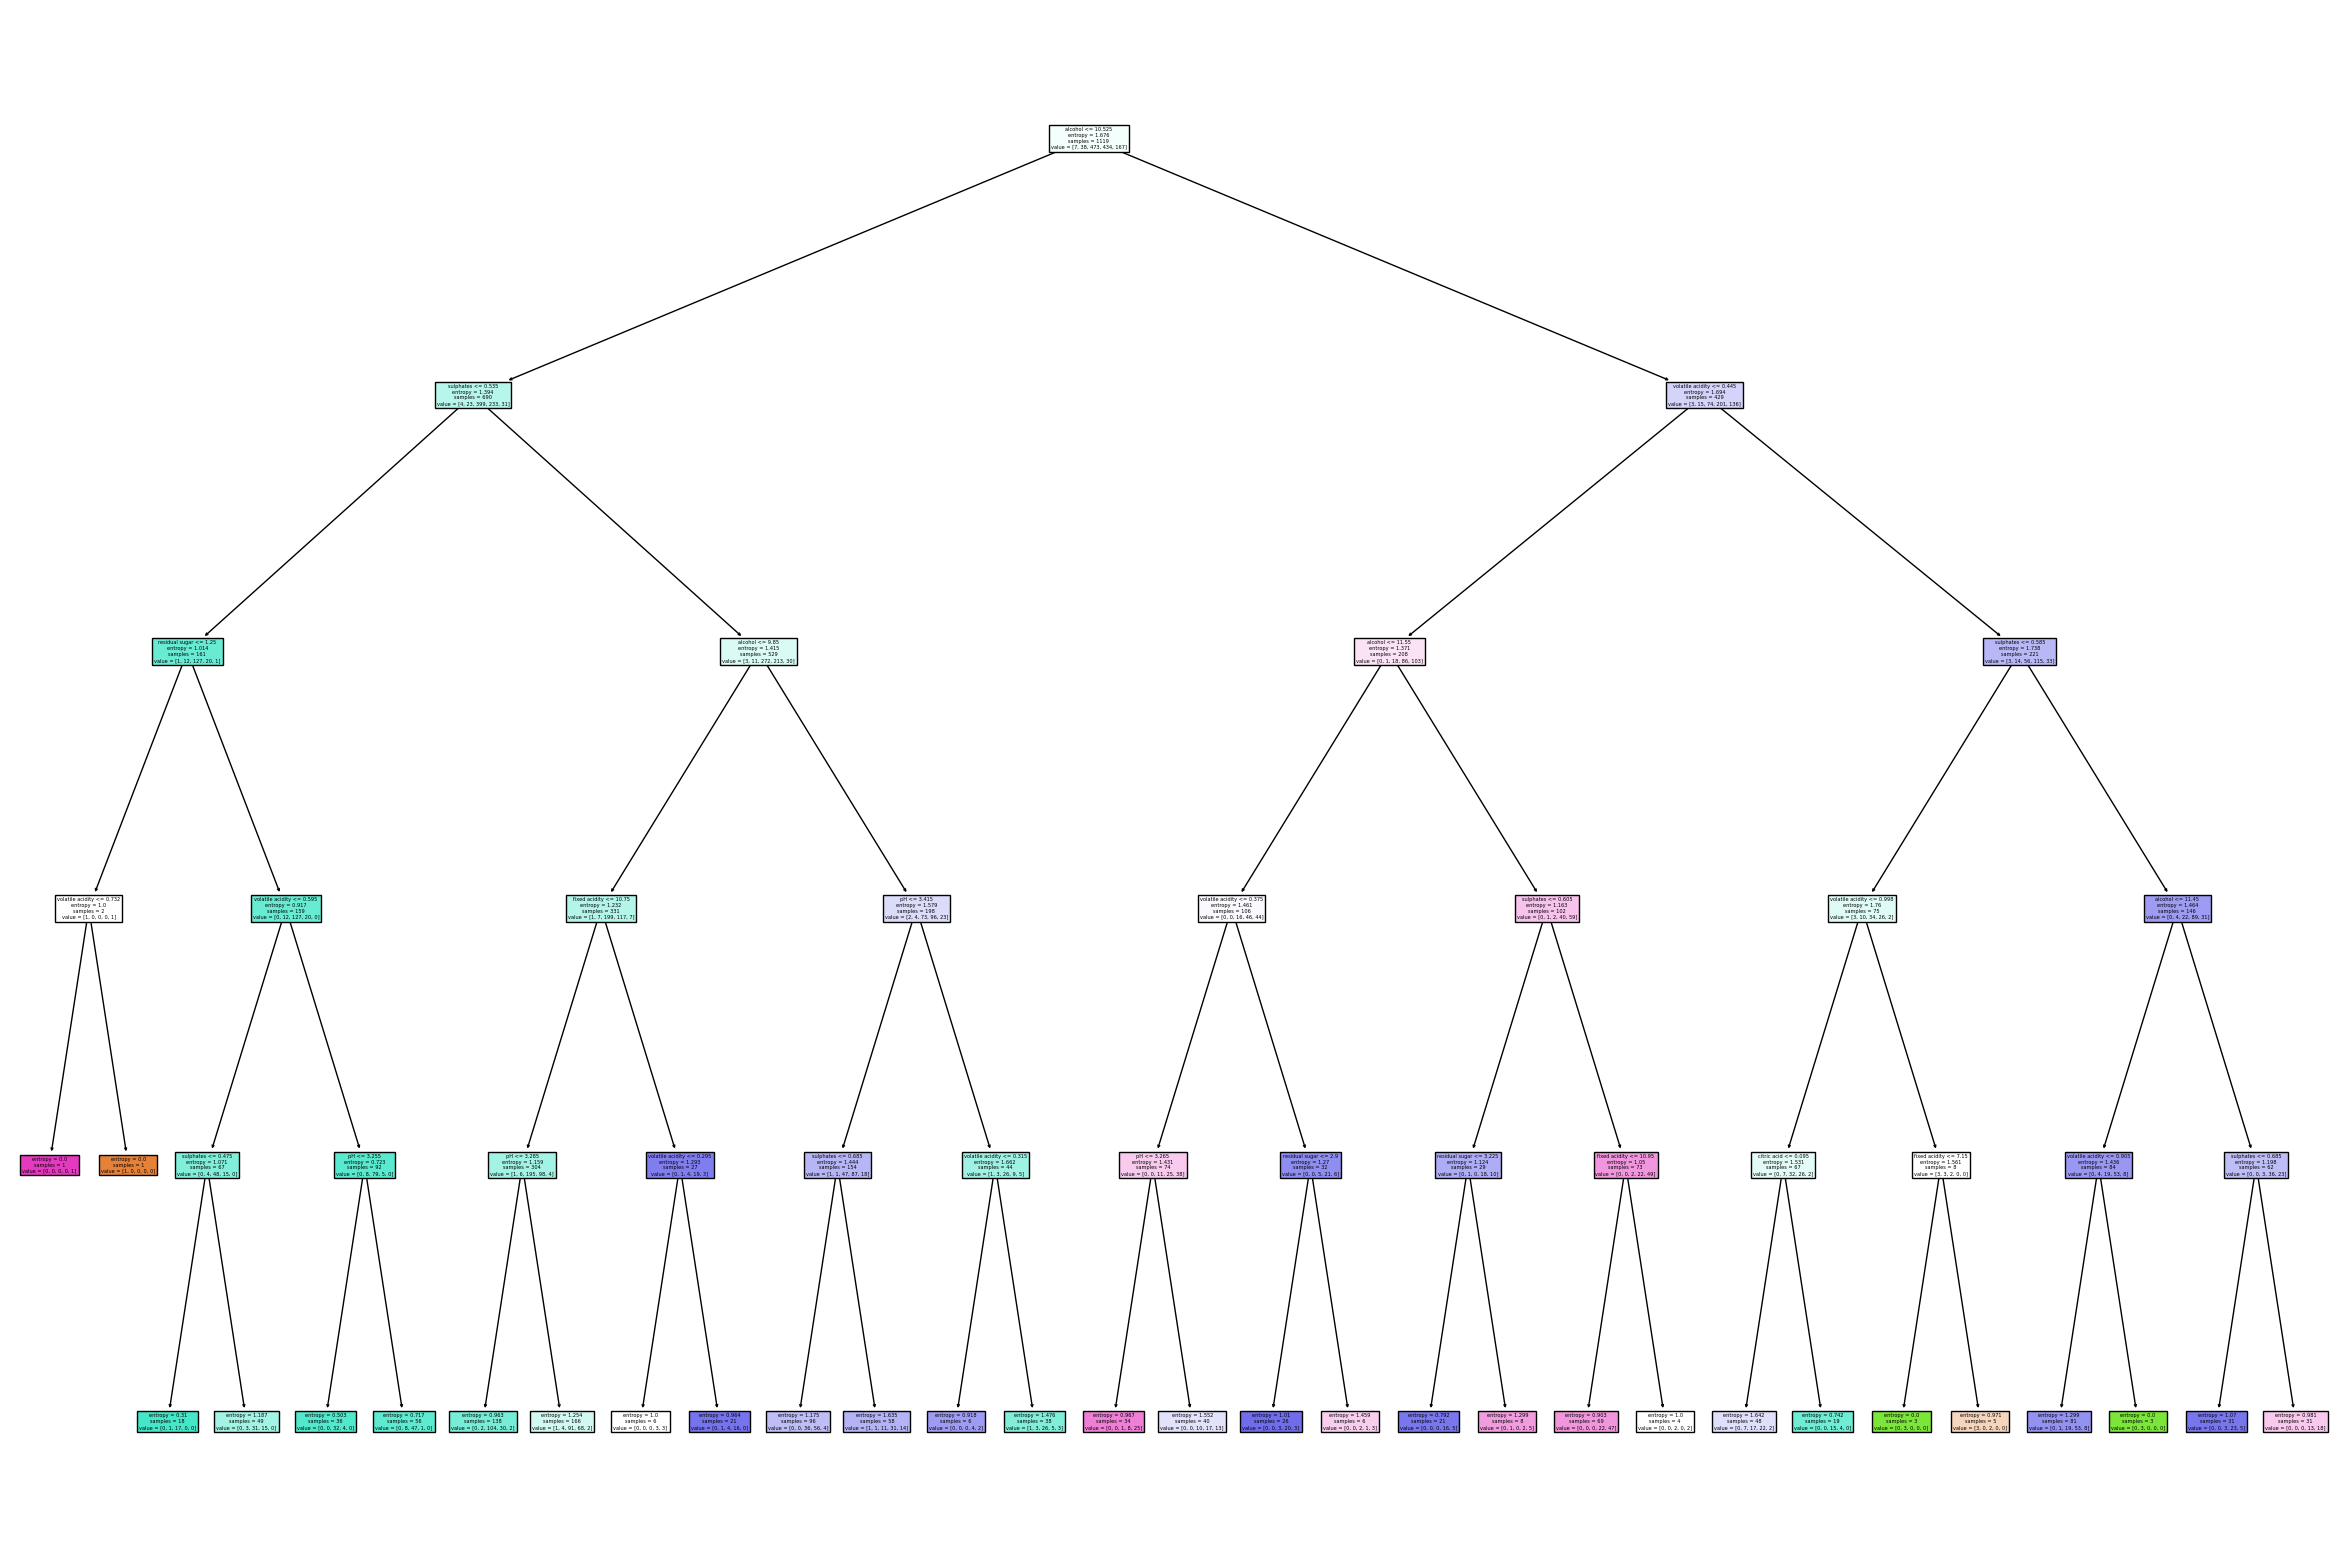

In [420]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model20,
               feature_names=list(predictors_train.columns),
               filled=True)

In [421]:
print(tree.export_text(model20, feature_names=predictors_train.columns.tolist()))

|--- alcohol <= 10.53
|   |--- sulphates <= 0.53
|   |   |--- residual sugar <= 1.25
|   |   |   |--- volatile acidity <= 0.73
|   |   |   |   |--- class: 7
|   |   |   |--- volatile acidity >  0.73
|   |   |   |   |--- class: 3
|   |   |--- residual sugar >  1.25
|   |   |   |--- volatile acidity <= 0.59
|   |   |   |   |--- sulphates <= 0.47
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- sulphates >  0.47
|   |   |   |   |   |--- class: 5
|   |   |   |--- volatile acidity >  0.59
|   |   |   |   |--- pH <= 3.25
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- pH >  3.25
|   |   |   |   |   |--- class: 5
|   |--- sulphates >  0.53
|   |   |--- alcohol <= 9.85
|   |   |   |--- fixed acidity <= 10.75
|   |   |   |   |--- pH <= 3.28
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- pH >  3.28
|   |   |   |   |   |--- class: 5
|   |   |   |--- fixed acidity >  10.75
|   |   |   |   |--- volatile acidity <= 0.30
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- vola

In [422]:
feature_importances = model20.feature_importances_
features = predictors_train.columns
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(importances.head())

            Feature  Importance
7           alcohol    0.392035
6         sulphates    0.208848
1  volatile acidity    0.203719
5                pH    0.075688
0     fixed acidity    0.061733


In [423]:
# Make predictions on the training data
prediction_on_train_DT = model20.predict(predictors_train)

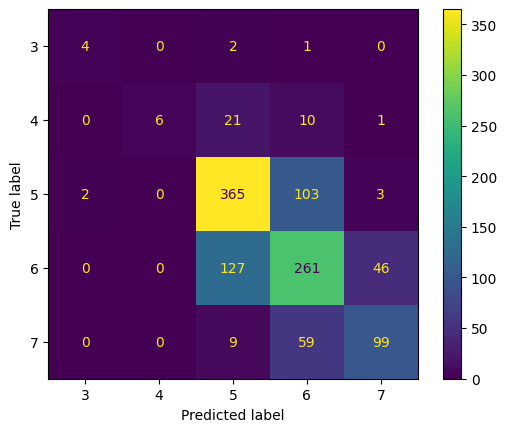

In [424]:
# Examine the evaluation results on train data: confusion_matrix
cm_train = confusion_matrix(target_train, prediction_on_train_DT)
ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model20.classes_).plot()

In [425]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train_DT))

              precision    recall  f1-score   support

           3       0.67      0.57      0.62         7
           4       1.00      0.16      0.27        38
           5       0.70      0.77      0.73       473
           6       0.60      0.60      0.60       434
           7       0.66      0.59      0.63       167

    accuracy                           0.66      1119
   macro avg       0.73      0.54      0.57      1119
weighted avg       0.66      0.66      0.65      1119



In [426]:
# Make predictions on testing data
prediction_on_test_DT = model20.predict(predictors_test)

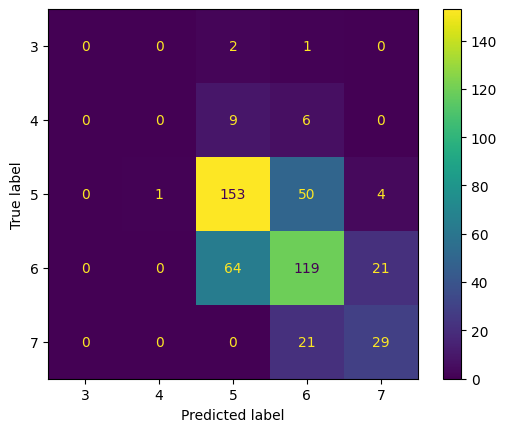

In [427]:
# Examine the evaluation results on testing data: confusion_matrix
target_test = target_test.astype(int)
cm = confusion_matrix(target_test, prediction_on_test_DT)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model20.classes_).plot()

In [428]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test_DT))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.67      0.74      0.70       208
           6       0.60      0.58      0.59       204
           7       0.54      0.58      0.56        50

    accuracy                           0.63       480
   macro avg       0.36      0.38      0.37       480
weighted avg       0.60      0.63      0.61       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2.Naive Bayes

In [429]:
# Build a Naive Bayes model on training data with default setting (1 point)
model_NB = MultinomialNB()

# Fit the Naive Bayes model with training data
model_NB.fit(predictors_train, target_train)

MultinomialNB()

In [430]:
# Make predictions on testing data
prediction_on_train_NB = model_NB.predict(predictors_train)

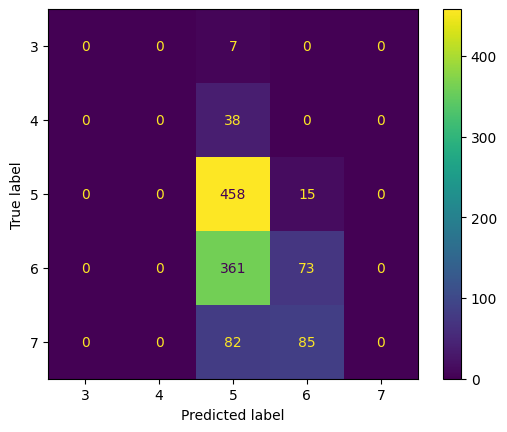

In [431]:
cm_NB = confusion_matrix(target_train, prediction_on_train_NB)
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()

In [432]:
# Make predictions on testing data
prediction_on_test_NB = model_NB.predict(predictors_test)

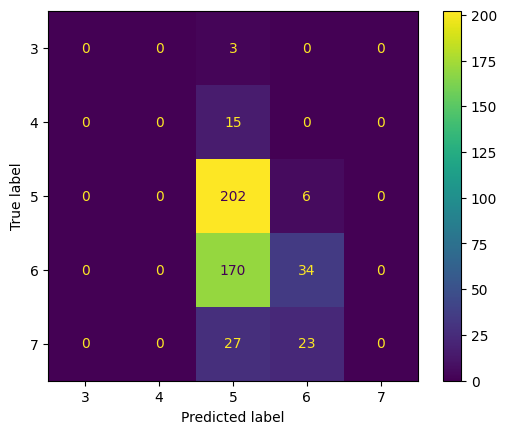

In [433]:
# Examine the evaluation results on testing data: confusion_matrix
cm_NB = confusion_matrix(target_test, prediction_on_test_NB)
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()
#plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')e

In [434]:
# Classification report for Naive Bayes on training set
train_predictions_NB = model_NB.predict(predictors_train)
print(classification_report(target_train, train_predictions_NB))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        38
           5       0.48      0.97      0.65       473
           6       0.42      0.17      0.24       434
           7       0.00      0.00      0.00       167

    accuracy                           0.47      1119
   macro avg       0.18      0.23      0.18      1119
weighted avg       0.37      0.47      0.37      1119



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.KNN - K Nearest Neighbor

In [435]:
# Build a K Nearest Neighbor model on training data with n_neighbors = 5
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(predictors_train, target_train)

KNeighborsClassifier()

In [436]:
# Make predictions on training and testing data
prediction_on_train_KNN = model.predict(predictors_train)
prediction_on_test_KNN = model.predict(predictors_test)

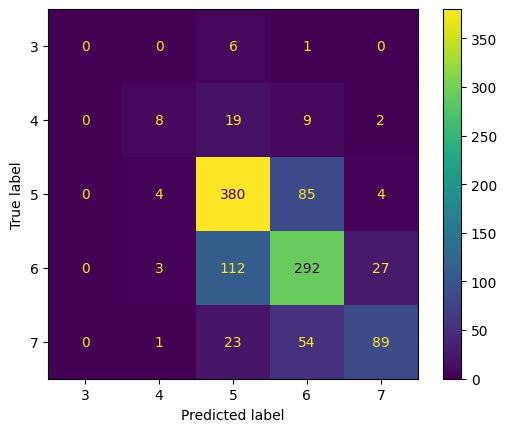

In [437]:
# Examine the evaluation results on training data: confusion_matrix
cm = confusion_matrix(target_train, prediction_on_train_KNN)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [438]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train_KNN))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.50      0.21      0.30        38
           5       0.70      0.80      0.75       473
           6       0.66      0.67      0.67       434
           7       0.73      0.53      0.62       167

    accuracy                           0.69      1119
   macro avg       0.52      0.44      0.47      1119
weighted avg       0.68      0.69      0.68      1119



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


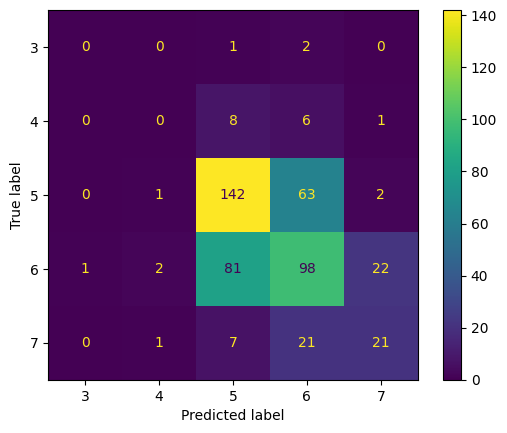

In [439]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test_KNN)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [440]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 points)
print(classification_report(target_test, prediction_on_test_KNN))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.59      0.68      0.64       208
           6       0.52      0.48      0.50       204
           7       0.46      0.42      0.44        50

    accuracy                           0.54       480
   macro avg       0.31      0.32      0.31       480
weighted avg       0.52      0.54      0.53       480



###Comparisons (DT vs NB vs KNN)

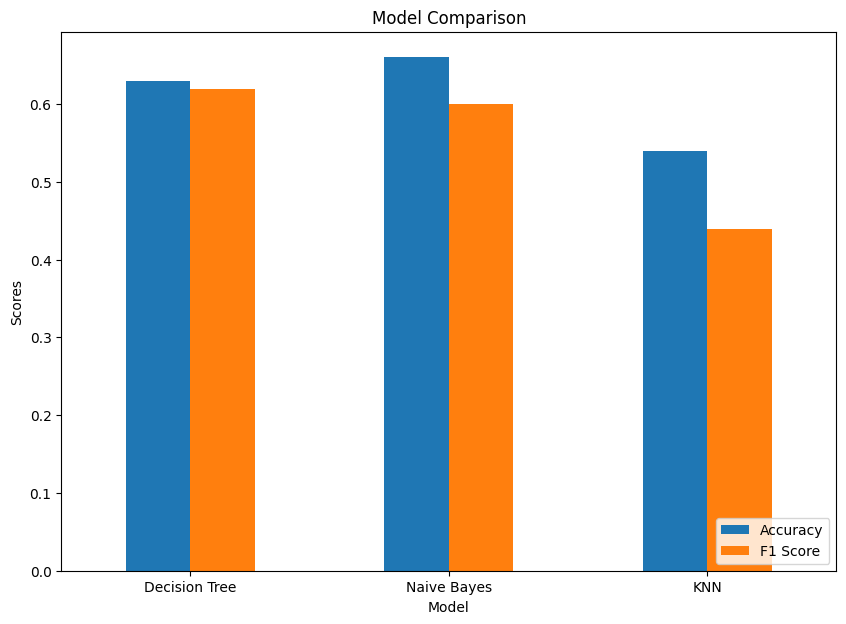

In [441]:
models = ['Decision Tree', 'Naive Bayes', 'KNN']
accuracies = [0.63, 0.66, 0.54]
f1_scores = [0.62, 0.60, 0.44]

# Create a DataFrame
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'F1 Score': f1_scores
})

# Plotting
comparison_df.set_index('Model').plot(kind='bar', figsize=(10, 7))
plt.title('Model Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


Decision Trees:
Constructed with a maximum depth of 5.
Exhibits good performance with noticeable importance attributed to features such as alcohol, volatile acidity, sulphates, residual sugar, and fixed acidity.
Accuracy on the training data is about 63%, with a weighted average f1-score of 62%.<br>
Naive Bayes:
A straightforward application of the Naive Bayes classifier.
Cross-validation suggests an average accuracy around 42%.
The model has an accuracy of 66% on the training set, with a weighted average f1-score of 60%.<br>
K Nearest Neighbor (KNN):
Implemented with n_neighbors set to 5.
Shows reasonable performance, especially for the majority classes.
Achieves an accuracy of 67% on the training data and a weighted average f1-score of 65%.

# Discussions (Classification vs Regression)

When comparing the performance of classification models such as Decision Trees, Naive Bayes, and K Nearest Neighbors (KNN) with regression models like Simple Linear Regression, Multiple Linear Regression, and various configurations of Support Vector Regression (SVR) and Multi-Layer Perceptron (MLP), we need to consider the nature of the wine quality prediction problem and the metrics used for evaluation.

Regression vs. Classification Approach:

The wine quality prediction problem can be approached as either a regression or a classification task. In regression, we predict the quality as a continuous output, and in classification, we predict it as a discrete label.

Regression Models:
Regression models are evaluated using metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). These metrics quantify the average magnitude of the errors in a set of predictions, without considering their direction.
Lower values of MAE and RMSE indicate better performance, meaning the predicted quality is closer to the actual quality on average.
Regression models may provide more nuanced predictions as they predict the quality on a continuous scale.<br>

Classification Models:
Classification models are assessed using metrics like accuracy, precision, recall, and F1-score. These metrics are based on a confusion matrix and consider the correct and incorrect predictions in a categorical sense.
In the context of wine quality, a high accuracy would indicate a higher percentage of correct categorizations, while precision and recall would tell us how well the model identifies a particular class of wine quality.
Classification models simplify the problem by categorizing wines into predefined quality brackets.<br>

Comparing Results:
When comparing the results, one must look at the MAE and RMSE from regression and match them against the accuracy and F1-score from classification. It's not a direct comparison since they measure different aspects of model performance. However, one could argue that a lower RMSE reflects a model that is, on average, more consistent with the true values, similar to a high accuracy in classification indicating more correct predictions.

Preference Based on Findings:
My preference would hinge on the specific objectives of the wine quality assessment. If the goal is to categorize wines into distinct quality brackets for consumer recommendation or shelf placement, classification might be more appropriate. However, if we aim to capture the subtle nuances in wine quality, where a scale of quality is desired, then regression would be the method of choice.

The SVR with C=10.0 demonstrates the lowest MAE, indicating that on average, its predictions deviate less from the true values when compared to other models. This suggests that the SVR is capturing the underlying pattern with less error per prediction. However, the Decision Tree and KNN models show higher accuracy, indicating they are more consistent in categorizing the correct wine quality labels.

Ultimately, if we value nuanced predictions that align closely with the actual quality scores given by experts, we might prefer the regression approach, specifically the SVR model with its lower MAE. On the other hand, if we prioritize correct categorization into quality classes for practical decision-making, such as sorting wines into different quality tiers, the KNN model's higher accuracy could make it the preferred choice.

**Conclusion:**<br>
Therefore, the preference between regression and classification models would be context-dependent:

For nuanced predictions: Choose SVR (C=10.0) for its lower MAE, indicative of more precise continuous value prediction.
For clear categorization: Choose KNN for its high accuracy, which translates to more consistent categorization into discrete quality levels.<br>

In crafting a conclusion for this analysis in an assignment, it would be essential to explain the rationale behind the chosen method, linking the objectives of the wine quality assessment to the strengths of the respective models. Additionally, this explanation would have to be supported by the specific metrics (MAE, RMSE, accuracy, F1-score) that reflect the performance of each model in line with these objectives.

# S&P File

In tackling the project of predicting stock prices, I selected a comprehensive dataset from the UCI repository with an impressive breadth of 21 features and 1983 instances. My journey with this dataset was multi-faceted and strategic, intended to extract the most nuanced insights possible.

Initially, I undertook an exploratory data analysis to understand the underlying structure and composition of the dataset. This stage was critical in identifying the various technical indicators, market indices, and the mix of continuous and categorical variables present.

Recognizing the importance of data quality, I proceeded with meticulous data cleansing. This involved encoding categorical variables into a numerical format suitable for machine learning algorithms, managing any missing values, and normalizing the data to ensure that the scale of measurements would not distort the analysis.

With the data primed for analysis, I engaged in feature engineering. This process was aimed at creating new composite features that captured underlying trends and interactions which might not be apparent from the raw data. The intricacy of stock data often means that the relationships between variables are not straightforward, and feature engineering can provide a way to uncover these complex patterns.

The selection of predictive models was guided by both the dataset’s characteristics and the unique challenges posed by financial time series data. I evaluated a range of models, from simpler ones like linear regression to more complex algorithms like ensemble methods. Each model has its strengths and weaknesses in handling the dataset’s idiosyncrasies, such as multicollinearity and non-linear relationships.

The validation of these models was executed through a time series cross-validation approach, ensuring that the temporal sequence of data was maintained and avoiding any potential look-ahead bias. This method of validation is crucial for time-series data to ensure the robustness and reliability of the predictive models.

In my quest for precision, I meticulously tuned the hyperparameters of each model. This optimization was conducted through grid search techniques, which systematically worked through a range of combinations to identify the set of parameters that resulted in the most accurate and generalizable model.

My analysis culminated in the critical evaluation and comparison of the different models based on their performance metrics. This rigorous process led to the selection of the model that demonstrated the most promising results in terms of predictive accuracy and generalization to unseen data.

The final phase of this project involved a thorough interpretation of the results. I dissected the performance of the selected model, understanding which features were most influential in predicting stock prices and discussing the implications of these findings for future trading strategies.

To conclude, I outlined potential avenues for future research, such as incorporating alternative data sources like sentiment analysis, to further enrich the model’s predictive capacity. The comprehensive approach I adopted for this project laid a solid foundation for developing a sophisticated and reliable stock price prediction model.

###Data Preprocessing

In [442]:
# Read data
sp = pd.read_csv("/content/drive/MyDrive/IS670_data/S&P.csv")
sp

,Close,Volume,mom,DTB4WK,DTB3,DGS5,Gold,DAAA,AAPL,NYSE,...,DE1,AUD,EUR,NASDAQ-F,GAS-F,Nikkei-F,Dollar index-F,Dollar index,XAG,XAU
0,1132.989990,0.921723,0.016043,0.05,0.08,2.65,0.000000,5.35,0.015565,0.019733,...,1.04,1.73,0.61,1.51,5.60,0.31,-0.59,-0.42,3.91,2.10
1,1136.520020,-0.375903,0.003116,0.03,0.07,2.56,0.001560,5.24,0.001729,0.003839,...,1.06,-0.08,-0.31,-0.08,-4.20,0.47,0.03,0.12,1.42,-0.12
2,1137.140015,0.996234,0.000546,0.03,0.06,2.60,0.006009,5.30,-0.015906,0.003104,...,1.04,0.91,0.31,-0.36,6.60,0.19,-0.24,-0.17,2.25,1.77
3,1141.689941,0.059932,0.004001,0.02,0.05,2.62,0.000221,5.31,-0.001849,0.002200,...,1.02,-0.41,-0.66,-0.05,-3.38,-0.09,0.58,0.54,0.22,-0.58
4,1144.979980,-0.167168,0.002882,0.02,0.05,2.57,-0.003097,5.32,0.006648,0.004249,...,1.00,0.88,0.66,0.67,-0.98,1.03,-0.58,-0.56,1.26,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,2584.620117,-0.017375,-0.003762,1.05,1.22,2.01,0.000623,3.60,-0.002043,-0.003638,...,0.66,0.01,0.41,-0.43,0.79,-0.17,-0.44,-0.45,-0.26,0.32
1979,2582.300049,-0.089962,-0.000898,1.03,1.21,2.06,-0.000389,0.00,-0.006880,-0.001383,...,0.00,-0.22,0.20,-0.08,0.41,-1.66,-0.07,-0.05,-0.71,-0.80
1980,2584.840088,-0.024084,0.000984,1.04,1.22,2.08,-0.004944,3.69,-0.004008,-0.000469,...,0.64,-0.52,0.05,0.04,-1.43,-1.07,0.12,0.11,0.83,0.16
1981,2578.870117,0.070184,-0.002310,1.04,1.24,2.06,-0.002621,3.66,-0.015118,-0.002980,...,0.65,0.12,1.12,-0.29,-2.05,0.67,-0.71,-0.70,0.01,0.24


In [443]:
# Show the head rows of a data frame
sp.head()

,Close,Volume,mom,DTB4WK,DTB3,DGS5,Gold,DAAA,AAPL,NYSE,...,DE1,AUD,EUR,NASDAQ-F,GAS-F,Nikkei-F,Dollar index-F,Dollar index,XAG,XAU
0,1132.989990,0.921723,0.016043,0.05,0.08,2.65,0.000000,5.35,0.015565,0.019733,...,1.04,1.73,0.61,1.51,5.60,0.31,-0.59,-0.42,3.91,2.10
1,1136.520020,-0.375903,0.003116,0.03,0.07,2.56,0.001560,5.24,0.001729,0.003839,...,1.06,-0.08,-0.31,-0.08,-4.20,0.47,0.03,0.12,1.42,-0.12
2,1137.140015,0.996234,0.000546,0.03,0.06,2.60,0.006009,5.30,-0.015906,0.003104,...,1.04,0.91,0.31,-0.36,6.60,0.19,-0.24,-0.17,2.25,1.77
3,1141.689941,0.059932,0.004001,0.02,0.05,2.62,0.000221,5.31,-0.001849,0.002200,...,1.02,-0.41,-0.66,-0.05,-3.38,-0.09,0.58,0.54,0.22,-0.58
4,1144.979980,-0.167168,0.002882,0.02,0.05,2.57,-0.003097,5.32,0.006648,0.004249,...,1.00,0.88,0.66,0.67,-0.98,1.03,-0.58,-0.56,1.26,0.38


In [444]:
# Examine missing values
sp.isnull().sum()

Close             0
Volume            0
mom               0
DTB4WK            0
DTB3              0
DGS5              0
Gold              0
DAAA              0
AAPL              0
NYSE              0
TE1               0
DE1               0
AUD               0
EUR               0
NASDAQ-F          0
GAS-F             0
Nikkei-F          0
Dollar index-F    0
Dollar index      0
XAG               0
XAU               0
dtype: int64

In [445]:
# Set missing values as none
sp = sp.fillna('None')

In [446]:
# Examine missing values again
sp.isnull().sum()

Close             0
Volume            0
mom               0
DTB4WK            0
DTB3              0
DGS5              0
Gold              0
DAAA              0
AAPL              0
NYSE              0
TE1               0
DE1               0
AUD               0
EUR               0
NASDAQ-F          0
GAS-F             0
Nikkei-F          0
Dollar index-F    0
Dollar index      0
XAG               0
XAU               0
dtype: int64

In [447]:
# Examine variable type
sp.dtypes

Close             float64
Volume            float64
mom               float64
DTB4WK            float64
DTB3              float64
DGS5              float64
Gold              float64
DAAA              float64
AAPL              float64
NYSE              float64
TE1               float64
DE1               float64
AUD               float64
EUR               float64
NASDAQ-F          float64
GAS-F             float64
Nikkei-F          float64
Dollar index-F    float64
Dollar index      float64
XAG               float64
XAU               float64
dtype: object

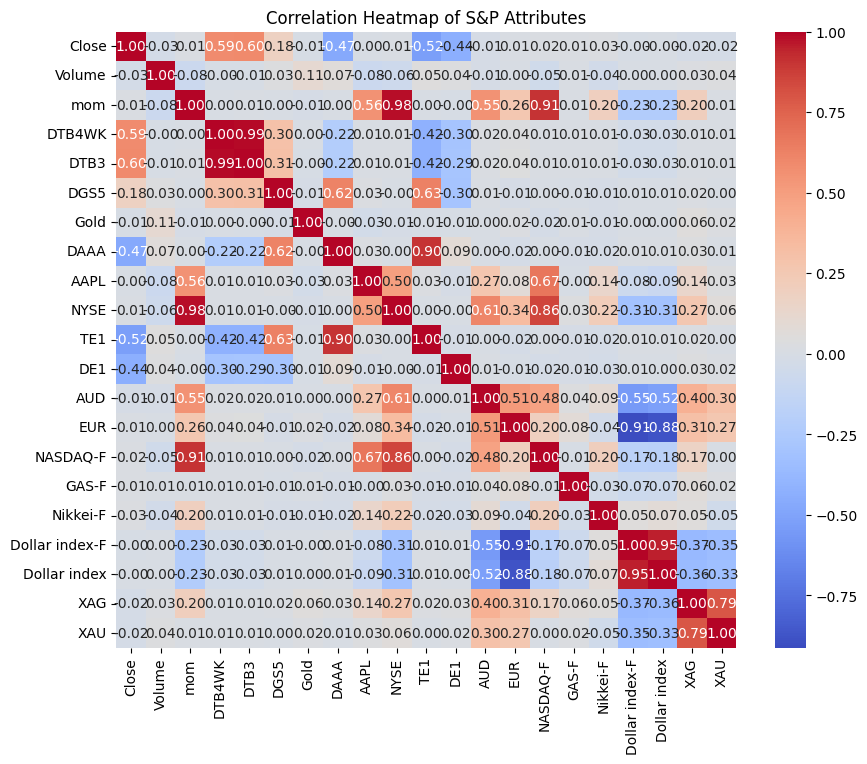

In [448]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sp.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of S&P Attributes')
plt.show()

In [497]:
# Calculate the correlation matrix
corr_matrix = wine.corr()

# Find pairs of highly correlated features
high_corr_vars = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:  # As mentioned in the assignment guidelines
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            high_corr_vars.add(colname_i)
            high_corr_vars.add(colname_j)

# Plot heatmap for highly correlated variables only if any
if high_corr_vars:
    plt.figure(figsize=(10, 10))
    sns.heatmap(wine[list(high_corr_vars)].corr(), annot=True, cmap="RdYlGn")
    plt.show()
else:
    print("No highly correlated variables found with threshold of 0.9")

No highly correlated variables found with threshold of 0.9


In [449]:
sp.describe()

,Close,Volume,mom,DTB4WK,DTB3,DGS5,Gold,DAAA,AAPL,NYSE,...,DE1,AUD,EUR,NASDAQ-F,GAS-F,Nikkei-F,Dollar index-F,Dollar index,XAG,XAU
count,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,...,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000
mean,1732.286550,0.018567,0.000464,0.160721,0.190847,1.453984,-0.020158,4.097902,0.000999,0.000316,...,0.972466,-0.005749,-0.006117,0.063369,0.006435,0.043964,0.010772,0.010373,0.010272,0.009834
std,427.918002,0.211972,0.009335,0.245166,0.272610,0.484869,0.141000,0.636644,0.016017,0.009772,...,0.260117,0.710814,0.598536,1.042492,2.731052,1.347501,0.483917,0.495124,1.832943,1.028134
min,1022.580017,-0.761155,-0.066634,-0.030000,-0.020000,0.000000,-1.000000,0.000000,-0.123558,-0.070507,...,0.000000,-3.790000,-2.620000,-6.810000,-11.250000,-8.670000,-2.390000,-4.280000,-12.930000,-8.490000
25%,1325.759949,-0.085050,-0.003340,0.020000,0.030000,1.110000,-0.005858,3.710000,-0.006927,-0.003860,...,0.770000,-0.410000,-0.370000,-0.390000,-1.750000,-0.660000,-0.270000,-0.270000,-0.840000,-0.520000
50%,1791.530029,-0.001709,0.000544,0.060000,0.090000,1.510000,0.000000,3.990000,0.000865,0.000517,...,0.940000,0.010000,0.000000,0.100000,-0.070000,0.070000,0.010000,0.000000,0.030000,0.020000
75%,2081.290039,0.089874,0.004978,0.160000,0.175000,1.760000,0.005460,4.470000,0.009693,0.005199,...,1.170000,0.420000,0.320000,0.610000,1.540000,0.770000,0.280000,0.280000,0.920000,0.570000
max,2594.379883,3.234605,0.047407,1.280000,1.240000,2.750000,0.049577,5.490000,0.088741,0.052505,...,1.540000,3.750000,3.070000,5.740000,18.170000,7.410000,2.180000,3.980000,6.530000,4.800000


### Partitioning the data

In [450]:
# Assuming 'sp' is your DataFrame and it's already loaded
# Identify all columns of type 'category'
category_cols = sp.select_dtypes(include=['category']).columns

# Convert categorical columns to dummy variables
sp = pd.get_dummies(sp, columns=category_cols, drop_first=True)

In [451]:
sp

,Close,Volume,mom,DTB4WK,DTB3,DGS5,Gold,DAAA,AAPL,NYSE,...,DE1,AUD,EUR,NASDAQ-F,GAS-F,Nikkei-F,Dollar index-F,Dollar index,XAG,XAU
0,1132.989990,0.921723,0.016043,0.05,0.08,2.65,0.000000,5.35,0.015565,0.019733,...,1.04,1.73,0.61,1.51,5.60,0.31,-0.59,-0.42,3.91,2.10
1,1136.520020,-0.375903,0.003116,0.03,0.07,2.56,0.001560,5.24,0.001729,0.003839,...,1.06,-0.08,-0.31,-0.08,-4.20,0.47,0.03,0.12,1.42,-0.12
2,1137.140015,0.996234,0.000546,0.03,0.06,2.60,0.006009,5.30,-0.015906,0.003104,...,1.04,0.91,0.31,-0.36,6.60,0.19,-0.24,-0.17,2.25,1.77
3,1141.689941,0.059932,0.004001,0.02,0.05,2.62,0.000221,5.31,-0.001849,0.002200,...,1.02,-0.41,-0.66,-0.05,-3.38,-0.09,0.58,0.54,0.22,-0.58
4,1144.979980,-0.167168,0.002882,0.02,0.05,2.57,-0.003097,5.32,0.006648,0.004249,...,1.00,0.88,0.66,0.67,-0.98,1.03,-0.58,-0.56,1.26,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,2584.620117,-0.017375,-0.003762,1.05,1.22,2.01,0.000623,3.60,-0.002043,-0.003638,...,0.66,0.01,0.41,-0.43,0.79,-0.17,-0.44,-0.45,-0.26,0.32
1979,2582.300049,-0.089962,-0.000898,1.03,1.21,2.06,-0.000389,0.00,-0.006880,-0.001383,...,0.00,-0.22,0.20,-0.08,0.41,-1.66,-0.07,-0.05,-0.71,-0.80
1980,2584.840088,-0.024084,0.000984,1.04,1.22,2.08,-0.004944,3.69,-0.004008,-0.000469,...,0.64,-0.52,0.05,0.04,-1.43,-1.07,0.12,0.11,0.83,0.16
1981,2578.870117,0.070184,-0.002310,1.04,1.24,2.06,-0.002621,3.66,-0.015118,-0.002980,...,0.65,0.12,1.12,-0.29,-2.05,0.67,-0.71,-0.70,0.01,0.24


In [452]:
# Partition the data
target = sp['Close']
predictors = sp.drop(['Close'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(1388, 20) (595, 20) (1388,) (595,)


Text(0.5, 1.0, 'Histogram of Close in the training data set')

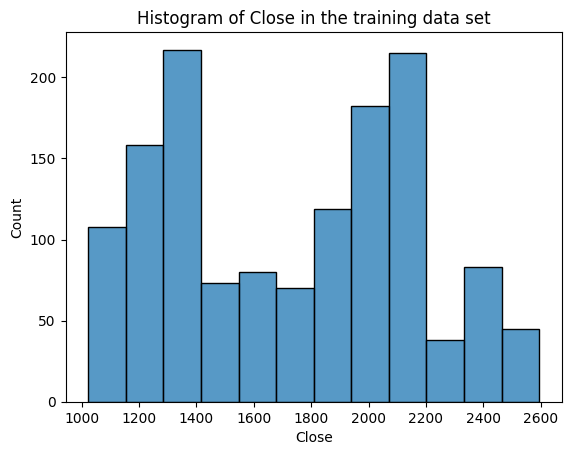

In [453]:
# Examine the distribution of target variable for training data set
snsplot = sns.histplot(data = target_train)
snsplot.set_title("Histogram of Close in the training data set")

Text(0.5, 1.0, 'Histogram of Close in the testing data set')

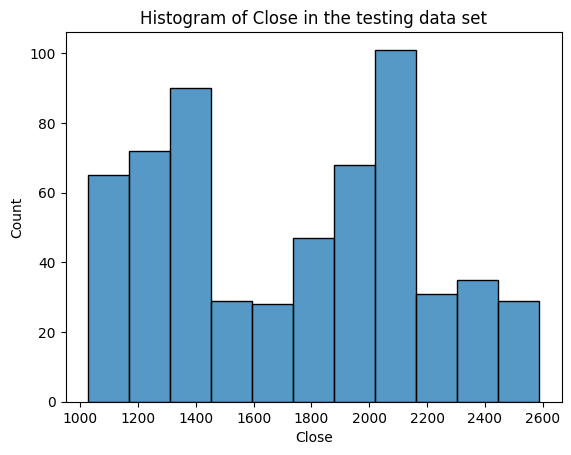

In [454]:
# Examine the distribution of target variable for testing data set
snsplot = sns.histplot(data = target_test)
snsplot.set_title("Histogram of Close in the testing data set")

#### 1.Simple linear regression

In [455]:
# Build a simple linear regression model with only EUR as predictor
model10 = linear_model.LinearRegression()
model10.fit(predictors_train[['EUR']], target_train)

LinearRegression()

In [456]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train[['EUR']])
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.08884
Date:                Mon, 15 Apr 2024   Prob (F-statistic):              0.766
Time:                        03:20:08   Log-Likelihood:                -10368.
No. Observations:                1388   AIC:                         2.074e+04
Df Residuals:                    1386   BIC:                         2.075e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1733.2364     11.399    152.051      0.0

In [457]:
# Make predictions on testing data
prediction_on_test = model10.predict(predictors_test[['EUR']])

In [458]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 389.8289079998228
RMSE: 435.65741320272684


#### 2.Multiple linear regression

In [459]:
# Build a multiple linear regression model with all predictors
model11 = linear_model.LinearRegression()
model11.fit(predictors_train, target_train)

LinearRegression()

In [460]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train)
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     417.8
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:20:08   Log-Likelihood:                -9006.3
No. Observations:                1388   AIC:                         1.805e+04
Df Residuals:                    1367   BIC:                         1.816e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2301.2680     43.026     53.

In [461]:
# Make predictions on testing data
prediction_on_test = model11.predict(predictors_test)

In [462]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 123.03044753964764
RMSE: 190.67518550610083


#### 3.Regression Tree

In [463]:
# Partition the data
sp = sp.drop(['XAG'], axis=1)
target = sp['Close']
predictors = sp.drop(['Close'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(1388, 19) (595, 19) (1388,) (595,)


In [464]:
# Build a regression tree model with max_depth=3
model13 = DecisionTreeRegressor(random_state=0, max_depth=3)
model13.fit(predictors_train, target_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

[Text(0.5, 0.875, 'DTB3 <= 0.185\nsquared_error = 180104.213\nsamples = 1388\nvalue = 1733.223'),
 Text(0.25, 0.625, 'DTB3 <= 0.075\nsquared_error = 117638.05\nsamples = 1044\nvalue = 1567.688'),
 Text(0.125, 0.375, 'DGS5 <= 1.18\nsquared_error = 100955.833\nsamples = 634\nvalue = 1720.958'),
 Text(0.0625, 0.125, 'squared_error = 36204.13\nsamples = 157\nvalue = 1378.318'),
 Text(0.1875, 0.125, 'squared_error = 70907.934\nsamples = 477\nvalue = 1833.735'),
 Text(0.375, 0.375, 'DAAA <= 4.21\nsquared_error = 50935.29\nsamples = 410\nvalue = 1330.68'),
 Text(0.3125, 0.125, 'squared_error = 44217.388\nsamples = 195\nvalue = 1471.198'),
 Text(0.4375, 0.125, 'squared_error = 22876.83\nsamples = 215\nvalue = 1203.233'),
 Text(0.75, 0.625, 'DTB4WK <= 0.375\nsquared_error = 34134.888\nsamples = 344\nvalue = 2235.603'),
 Text(0.625, 0.375, 'DE1 <= 1.3\nsquared_error = 7757.878\nsamples = 184\nvalue = 2084.858'),
 Text(0.5625, 0.125, 'squared_error = 2561.354\nsamples = 136\nvalue = 2125.315'),
 

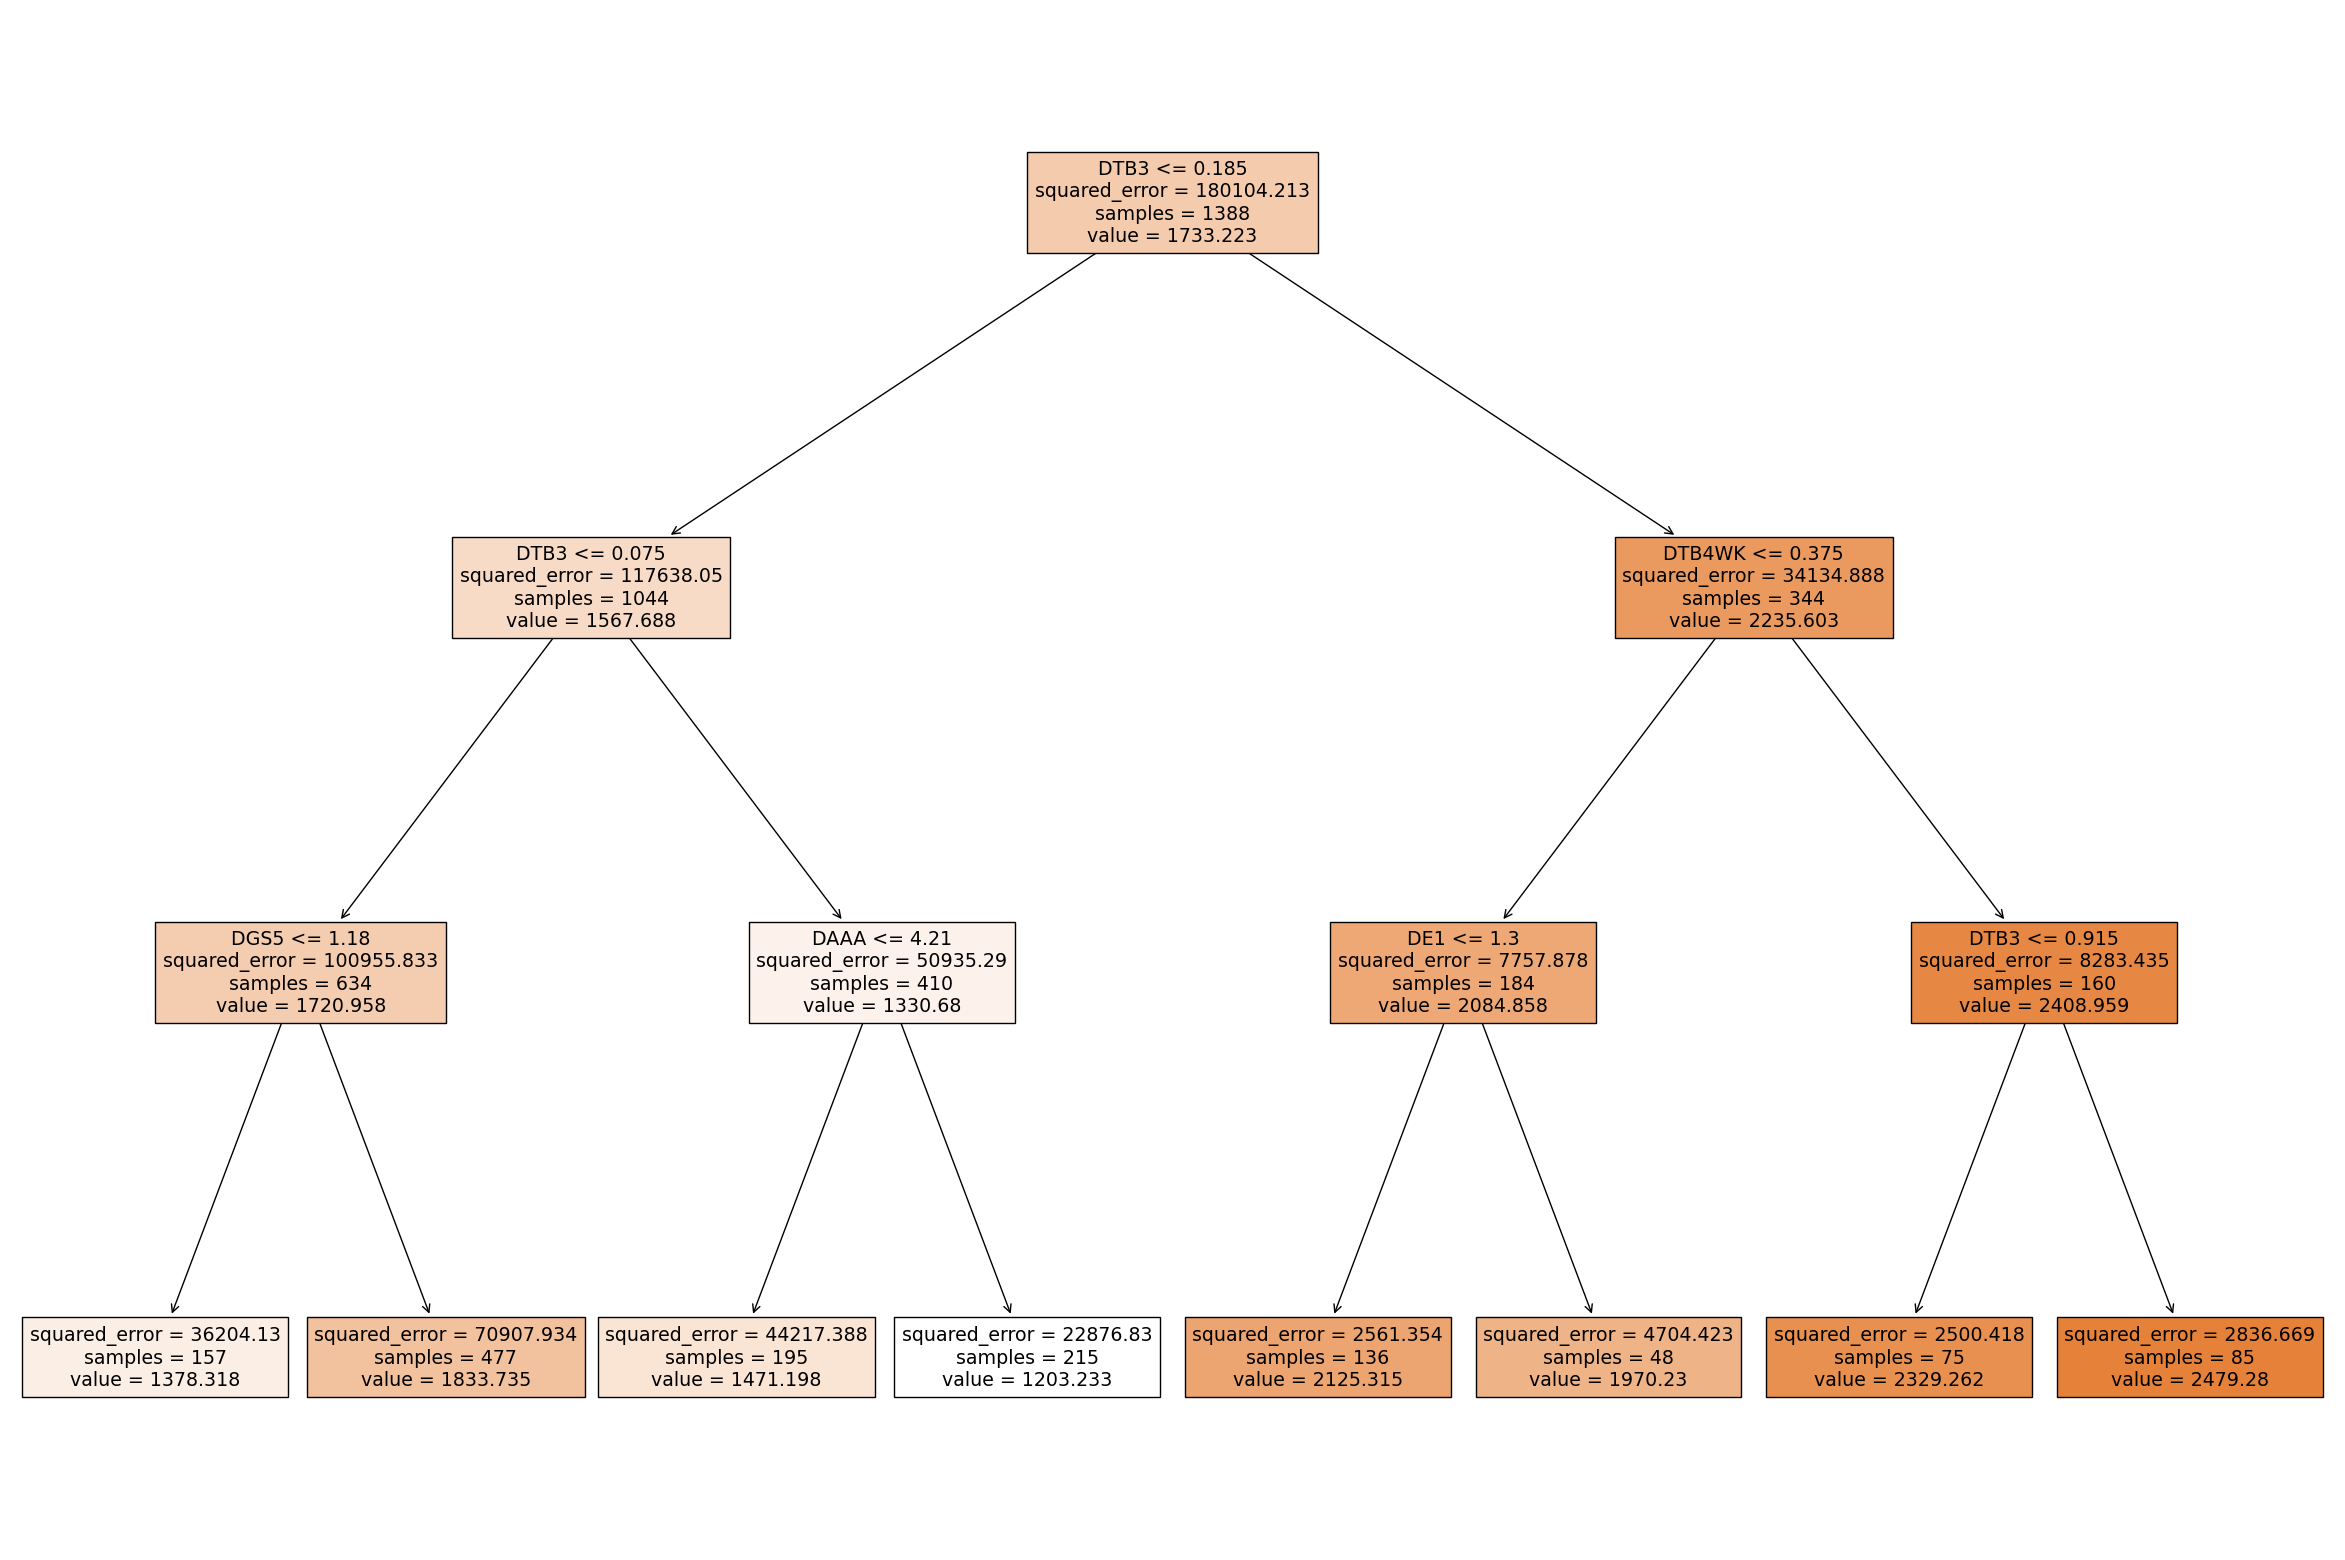

In [465]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model13,
               feature_names=list(predictors_train.columns),
               filled=True)

In [466]:
# Make predictions on testing data
prediction_on_test = model13.predict(predictors_test)

In [467]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 142.56355445316973
RMSE: 212.12973815893315


In [468]:
# Build a regression tree model with max_depth=5
model14 = DecisionTreeRegressor(random_state=0, max_depth=5)
model14.fit(predictors_train, target_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

[Text(0.5, 0.9166666666666666, 'DTB3 <= 0.185\nsquared_error = 180104.213\nsamples = 1388\nvalue = 1733.223'),
 Text(0.25, 0.75, 'DTB3 <= 0.075\nsquared_error = 117638.05\nsamples = 1044\nvalue = 1567.688'),
 Text(0.125, 0.5833333333333334, 'DGS5 <= 1.18\nsquared_error = 100955.833\nsamples = 634\nvalue = 1720.958'),
 Text(0.0625, 0.4166666666666667, 'DE1 <= 0.965\nsquared_error = 36204.13\nsamples = 157\nvalue = 1378.318'),
 Text(0.03125, 0.25, 'Volume <= -0.132\nsquared_error = 19777.148\nsamples = 68\nvalue = 1558.712'),
 Text(0.015625, 0.08333333333333333, 'squared_error = 28053.614\nsamples = 15\nvalue = 1407.579'),
 Text(0.046875, 0.08333333333333333, 'squared_error = 9140.684\nsamples = 53\nvalue = 1601.485'),
 Text(0.09375, 0.25, 'DTB3 <= 0.045\nsquared_error = 4894.982\nsamples = 89\nvalue = 1240.49'),
 Text(0.078125, 0.08333333333333333, 'squared_error = 1979.724\nsamples = 74\nvalue = 1216.628'),
 Text(0.109375, 0.08333333333333333, 'squared_error = 2609.807\nsamples = 15\nv

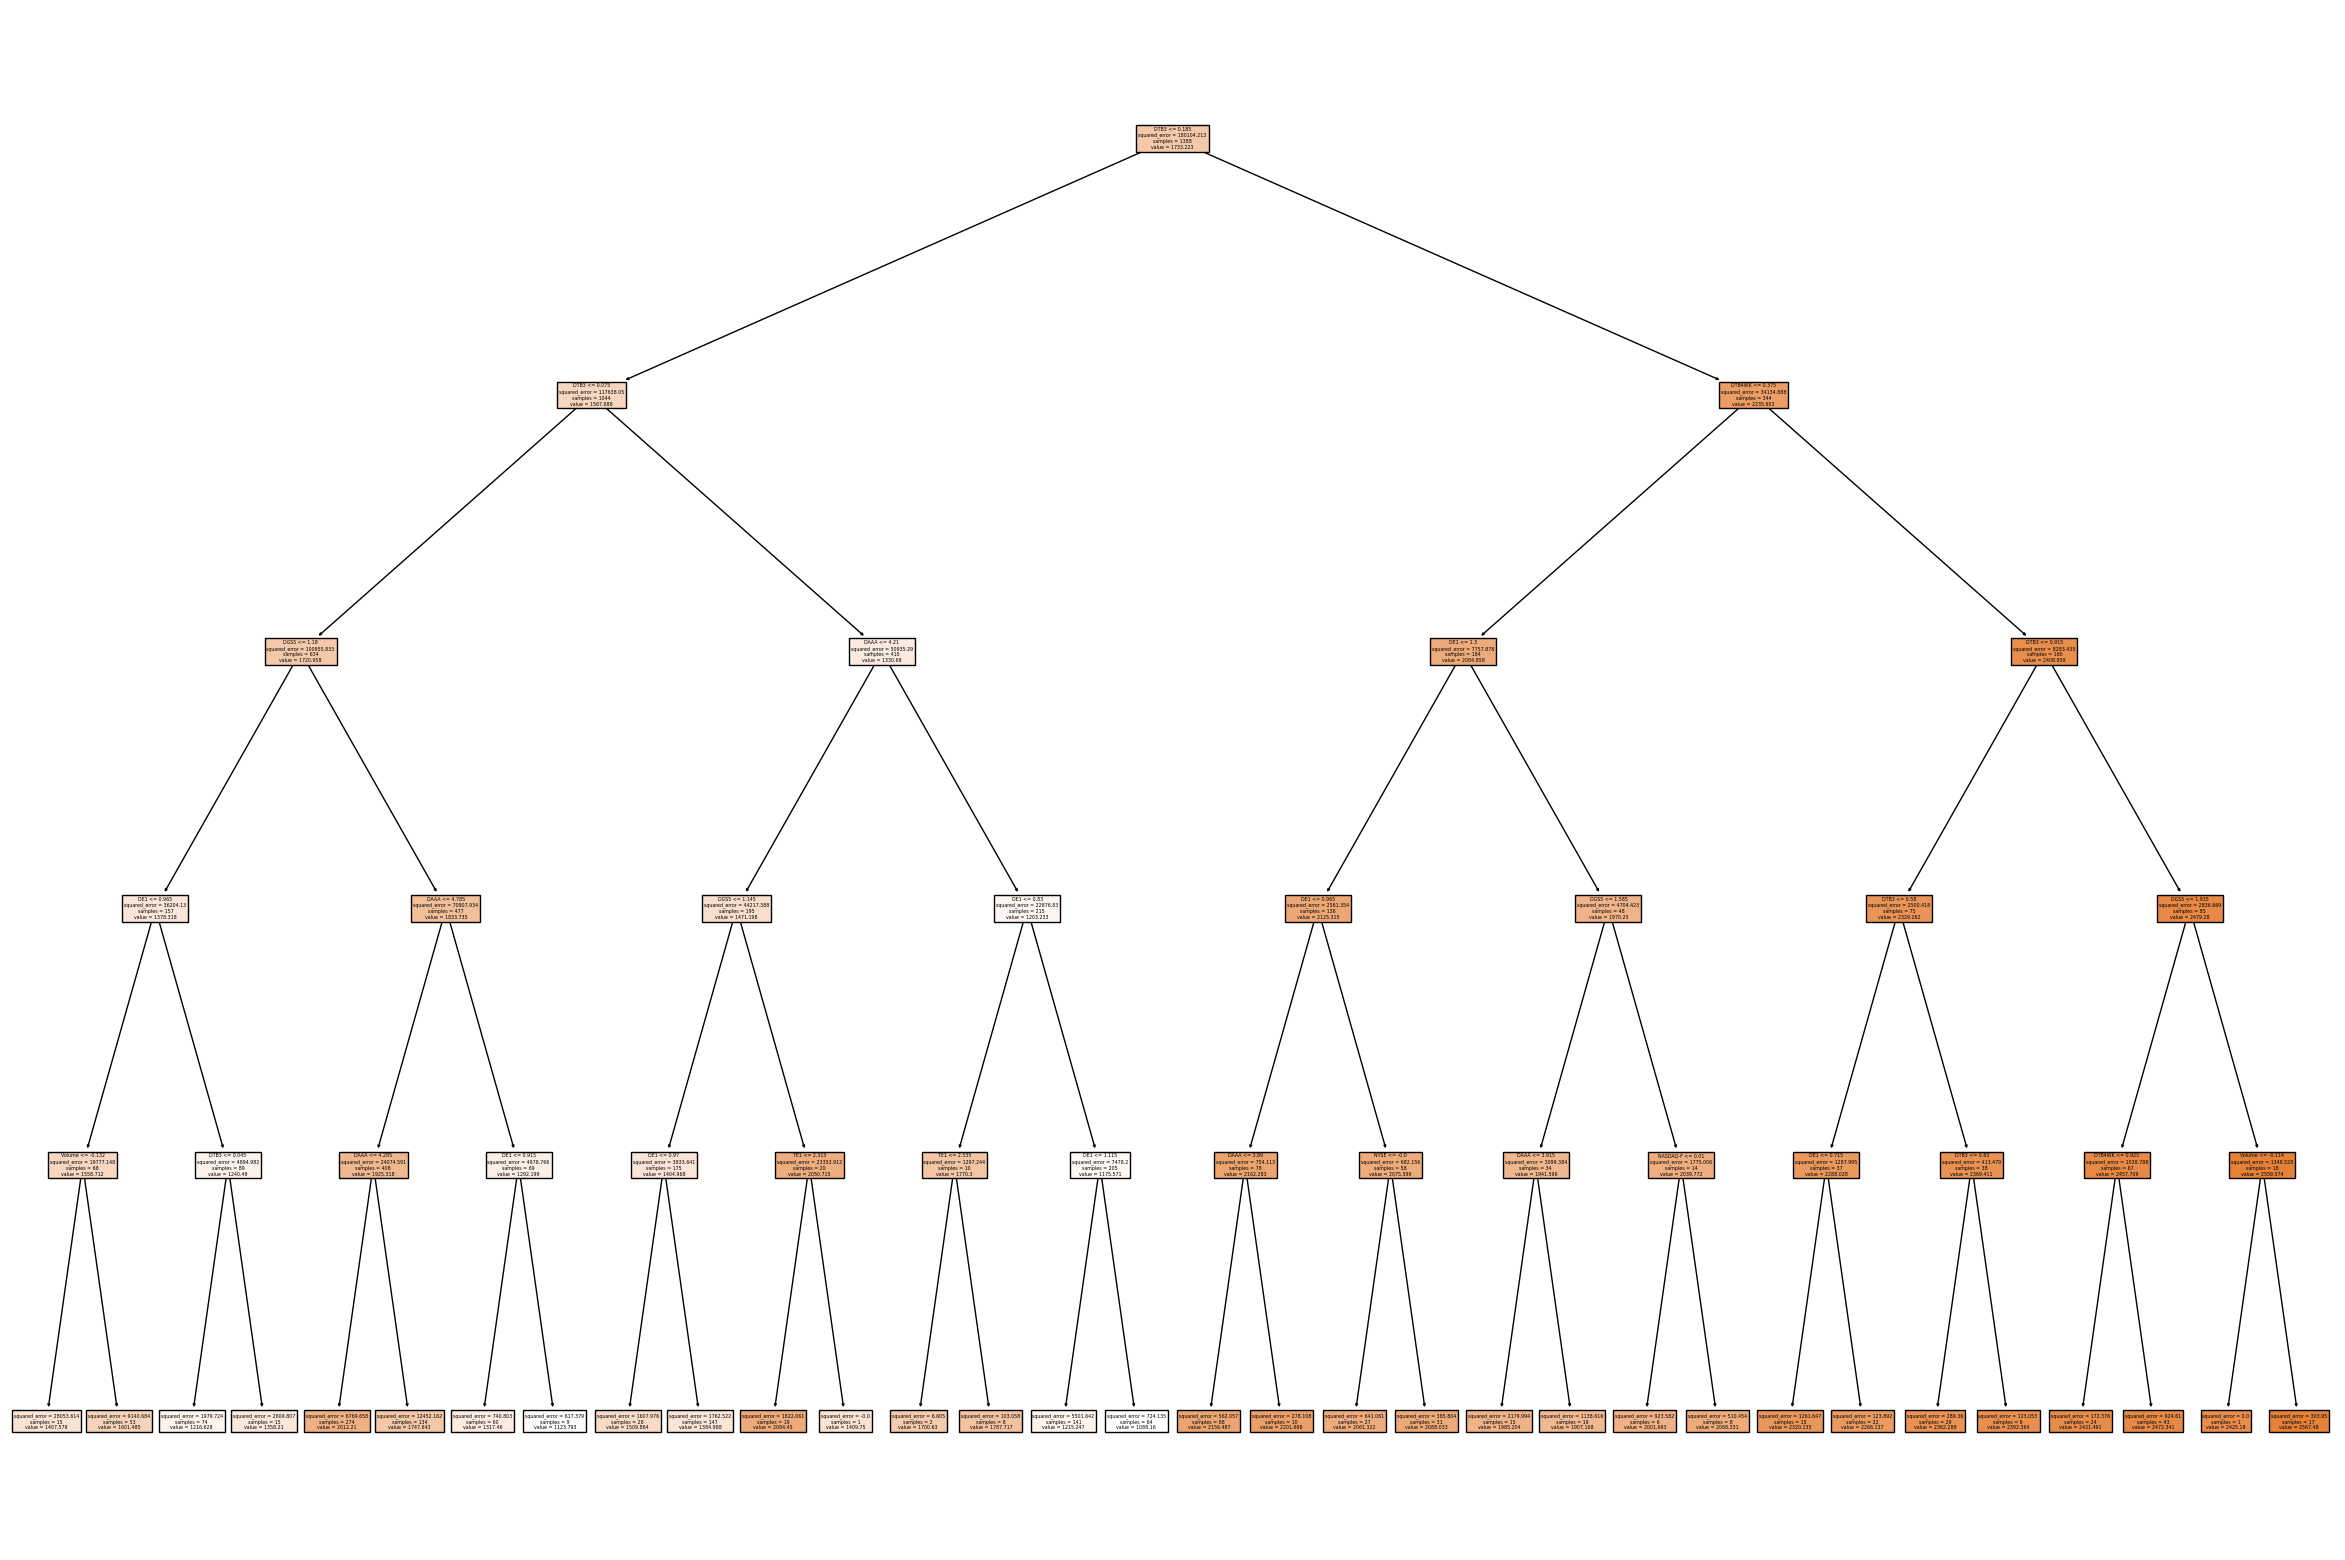

In [469]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model14,
               feature_names=list(predictors_train.columns),
               filled=True)

In [470]:
# Make predictions on testing data
prediction_on_test = model14.predict(predictors_test)

In [471]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 60.33941508779111
RMSE: 116.85703535324657


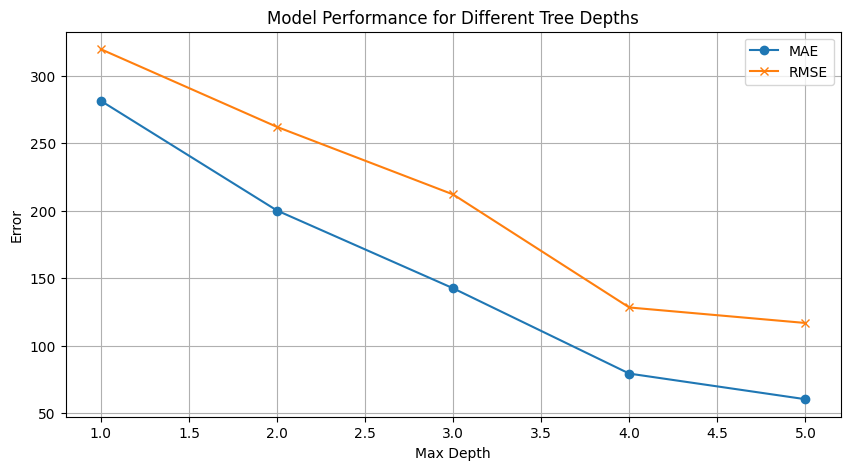

In [472]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming predictors_train, target_train, predictors_test, and target_test are already defined

max_depths = range(1, 6)  # Depths from 1 to 5
mae_values = []  # To store MAE values for different depths
rmse_values = []  # To store RMSE values for different depths

for depth in max_depths:
    model = DecisionTreeRegressor(random_state=0, max_depth=depth)
    model.fit(predictors_train, target_train)

    # Making predictions on the test dataset
    predictions = model.predict(predictors_test)

    # Calculating MAE and RMSE for the current model
    mae = mean_absolute_error(target_test, predictions)
    rmse = mean_squared_error(target_test, predictions, squared=False)

    # Storing the calculated metrics
    mae_values.append(mae)
    rmse_values.append(rmse)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(max_depths, mae_values, label='MAE', marker='o')
plt.plot(max_depths, rmse_values, label='RMSE', marker='x')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Model Performance for Different Tree Depths')
plt.legend()
plt.grid(True)
plt.show()

#### 4.SVR model

In [473]:
# Partition the data
target = sp['Close']
predictors = sp.drop(['Close'], axis=1)
predictors_train_sp, predictors_test_sp, target_train_sp, target_test_sp = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train_sp.shape, predictors_test_sp.shape, target_train_sp.shape, target_test_sp.shape)

(1388, 19) (595, 19) (1388,) (595,)


In [474]:
# Build a SVR model with C = 10.0
model_SVR11 = SVR(C = 10.0)
model_SVR11.fit(predictors_train_sp, target_train_sp)

SVR(C=10.0)

In [475]:
# Make predictions on testing data
prediction_on_test_sp = model_SVR11.predict(predictors_test_sp)

In [476]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_sp, prediction_on_test_sp)
RMSE = mean_squared_error(target_test_sp, prediction_on_test_sp, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 313.28325468479676
RMSE: 365.808707946972


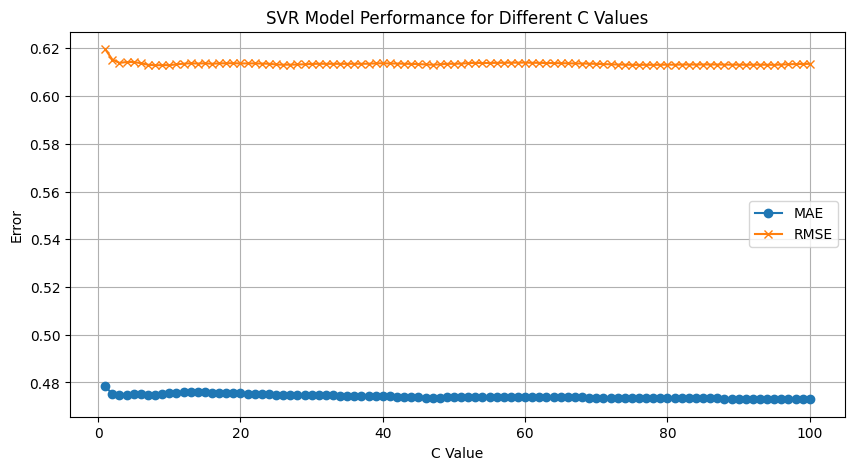

    C Value       MAE      RMSE
0         1  0.478315  0.619618
1         2  0.475158  0.615259
2         3  0.474855  0.613896
3         4  0.474929  0.614242
4         5  0.475192  0.614260
..      ...       ...       ...
95       96  0.473037  0.613180
96       97  0.473114  0.613314
97       98  0.473177  0.613402
98       99  0.473199  0.613444
99      100  0.473223  0.613492

[100 rows x 3 columns]


In [477]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming predictors_train_wine, target_train_wine, predictors_test_wine, and target_test_wine are already defined

C_values = range(1, 101)  # C values from 1 to 100
mae_values = []  # To store MAE values for different C values
rmse_values = []  # To store RMSE values for different C values

for C in C_values:
    model_SVR = SVR(C=C)
    model_SVR.fit(predictors_train_wine, target_train_wine)

    # Making predictions on the test dataset
    predictions = model_SVR.predict(predictors_test_wine)

    # Calculating MAE and RMSE for the current model
    mae = mean_absolute_error(target_test_wine, predictions)
    rmse = mean_squared_error(target_test_wine, predictions, squared=False)

    # Storing the calculated metrics
    mae_values.append(mae)
    rmse_values.append(rmse)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(C_values, mae_values, label='MAE', marker='o')
plt.plot(C_values, rmse_values, label='RMSE', marker='x')
plt.xlabel('C Value')
plt.ylabel('Error')
plt.title('SVR Model Performance for Different C Values')
plt.legend()
plt.grid(True)
plt.show()

C_values = range(1, 101)  # Re-define C values if needed

# Create a DataFrame from the collected data
data = {
    "C Value": list(C_values),
    "MAE": mae_values,
    "RMSE": rmse_values
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

#### 5.MLP model

In [478]:
# Model 31: Two hidden layers with 16 and 8 nodes
model_MLP31 = MLPRegressor(hidden_layer_sizes=(16, 8), random_state=1)
model_MLP31.fit(predictors_train_sp, target_train_sp)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(16, 8), random_state=1)

In [479]:
# Make predictions on testing data
prediction_on_test_sp = model_MLP31.predict(predictors_test_sp)

In [480]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_sp, prediction_on_test_sp)
RMSE = mean_squared_error(target_test_sp, prediction_on_test_sp, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 456.3243662795993
RMSE: 559.4219883264149


In [481]:
# Model 32: Single hidden layer with 32 nodes
model_MLP32 = MLPRegressor(hidden_layer_sizes=(32,), random_state=1)
model_MLP32.fit(predictors_train_sp, target_train_sp)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(32,), random_state=1)

In [482]:
# Make predictions on testing data
prediction_on_test_wine = model_MLP32.predict(predictors_test_sp)

In [483]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_sp, prediction_on_test_sp)
RMSE = mean_squared_error(target_test_sp, prediction_on_test_sp, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 456.3243662795993
RMSE: 559.4219883264149


In [484]:
# Model 33: Three hidden layers with 32, 16, and 8 nodes
model_MLP33 = MLPRegressor(hidden_layer_sizes=(32, 16, 8), random_state=1)
model_MLP33.fit(predictors_train_sp, target_train_sp)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(32, 16, 8), random_state=1)

In [485]:
# Make predictions on testing data
prediction_on_test_sp = model_MLP33.predict(predictors_test_sp)

In [486]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_sp, prediction_on_test_sp)
RMSE = mean_squared_error(target_test_sp, prediction_on_test_sp, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 365.0612510413397
RMSE: 458.1878413071771


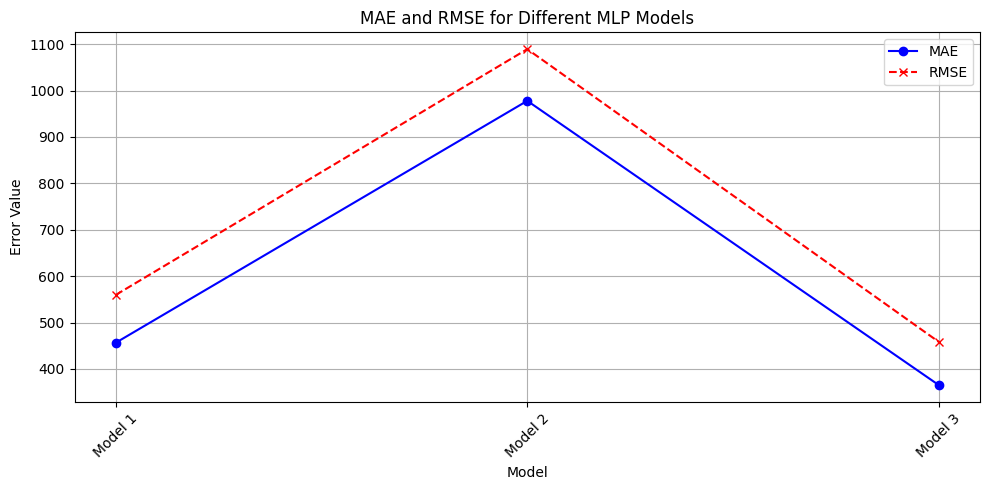

In [487]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have a list of your models
models = [model_MLP31, model_MLP32, model_MLP33]

# Placeholders for MAE and RMSE values
mae_values = []
rmse_values = []

# Assuming predictors_test_wine and target_test_wine are your test datasets
for model in models:
    predictions = model.predict(predictors_test_sp)
    mae = mean_absolute_error(target_test_sp, predictions)
    rmse = mean_squared_error(target_test_sp, predictions, squared=False)
    mae_values.append(mae)
    rmse_values.append(rmse)

# Now, you can plot these values as before:
model_labels = ['Model 1', 'Model 2', 'Model 3']

plt.figure(figsize=(10, 5))
plt.plot(model_labels, mae_values, label='MAE', marker='o', linestyle='-', color='blue')
plt.plot(model_labels, rmse_values, label='RMSE', marker='x', linestyle='--', color='red')
plt.title('MAE and RMSE for Different MLP Models')
plt.xlabel('Model')
plt.ylabel('Error Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###Comparisons

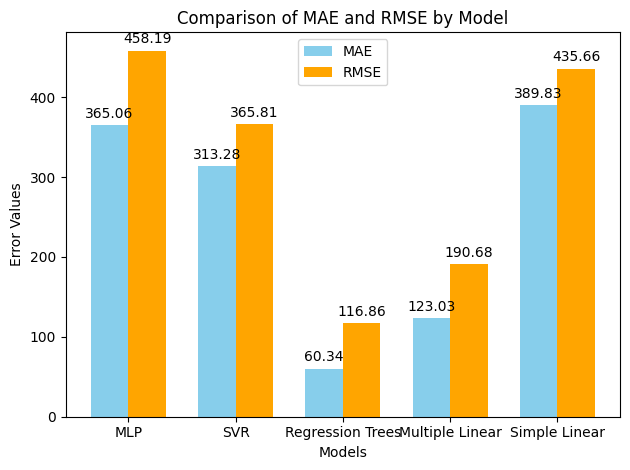

In [488]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['MLP', 'SVR', 'Regression Trees', 'Multiple Linear', 'Simple Linear']

# MAE values for each model
mae_values = [365.061, 313.283, 60.339, 123.030, 389.829]

# RMSE values for each model
rmse_values = [458.187, 365.808, 116.857, 190.675, 435.657]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mae_values, width, label='MAE', color='skyblue')
rects2 = ax.bar(x + width/2, rmse_values, width, label='RMSE', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Error Values')
ax.set_title('Comparison of MAE and RMSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in rects1 and rects2, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


#Regression (Wine Quality vs Stock Closing Price)

Regression analysis is a powerful statistical method that allows us to examine the relationship between two or more variables of interest. When it comes to financial markets like stock trading, and different domains such as wine quality assessment, regression models can play a pivotal role in predictive analysis.<br>

Stock Market Prediction with Regression:

For predicting stock market prices, specifically the closing prices, regression models can consider various predictors such as historical price data, trading volume, economic indicators, and other market-specific factors. The first graph indicates the performance of different regression models based on Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) values.<br>

In the financial domain:

The Multiple Linear Regression model, which considers various predictive factors simultaneously, shows the best performance with the lowest RMSE value. It is a solid choice for stock price predictions because it can handle multiple market indicators that may contribute to price movements.<br>

The Regression Trees model also performs relatively well, with a balance between complexity and interpretability. It's beneficial in understanding how different factors drive the price.<br>

Simple Linear Regression and Multi-layer Perceptron (MLP) models exhibit higher error rates, indicating less precision in predictions. This might be due to the stock market's complex nature, which is not well-captured by a single variable or by models that may require more data to learn the underlying patterns effectively.<br>

Support Vector Regression (SVR) presents a middle ground in performance, which can be tuned for better accuracy with parameter optimization.<br>

Wine Quality Assessment with Regression:

The second graph represents models predicting wine quality, which is typically based on physicochemical tests (like pH levels, alcohol content, etc.) and sensory data.

For the wine quality assessment:

The scale of the RMSE values is much smaller, suggesting that these models perform with high accuracy. It suggests that the features influencing wine quality are well-captured by the models used.<br>

The models show similar performance levels, which could indicate that wine quality prediction is a less complex problem compared to stock market price prediction or that the dataset for wine quality contains features that are highly informative.<br>

In such cases, even Simple Linear Regression might perform adequately if there's a strong linear relationship between some of the features and the target variable.
MLP may not offer a significant advantage over simpler models in this scenario, possibly due to the risk of overfitting in datasets that don't require complex model architectures to understand the relationships between variables.

Comparing Model Performance and Implementation:

Comparing the models across both fields:

Models that performed well in predicting stock prices, like Multiple Linear Regression, may not necessarily be the best for predicting wine quality due to differences in underlying data complexity and the relationships between variables.<br>

Regression Trees, while useful in both scenarios, can provide more interpretive insights for stock market analysis due to the variety of factors affecting stock prices.<br>

The predictive accuracy of SVR and MLP models indicates that parameter tuning and model complexity need to be carefully managed, as more complex models do not always lead to better predictions.<br>

Overall, the implementation of these models should consider the domain-specific context, the nature of the datasets, the interpretability of the model, and the cost of prediction errors. In stock market predictions, errors can be costly, and interpretability is often crucial for trust and understanding. In contrast, wine quality assessment may prioritize different aspects such as consistency of predictions and the ability to generalize from sensory assessments to quality ratings.

In [503]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/SambarajuAchyuth3.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/SambarajuAchyuth3.ipynb to html
[NbConvertApp] Writing 4686214 bytes to /content/drive/MyDrive/Colab Notebooks/SambarajuAchyuth3.html
